In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s  0:00:00


In [74]:
df1 = pd.read_csv("business-licences-1997-to-2012.csv", sep=';')
df2 = pd.read_csv("business-licences-2013-to-2024.csv", sep=';')
df3 = pd.read_csv("business-licences.csv", sep=';')
df = pd.concat([df1, df2, df3], ignore_index=True)

/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_32526/4193657395.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("business-licences-1997-to-2012.csv", sep=';')
/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_32526/4193657395.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("business-licences-2013-to-2024.csv", sep=';')
/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_32526/4193657395.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("business-licences.csv", sep=';')


In [75]:
import pandas as pd

# Comprehensive business type mapping (including historic types)
business_type_mapping = {
    # Technology & Digital
    'Information Communication Technology': 'Technology & Digital',
    'Digital Entertainment and Interactive Technology': 'Technology & Digital',
    'Computer Services *Historic*': 'Technology & Digital',
    'Telecommunications *Historic*': 'Technology & Digital',
    
    # Construction & Building
    'General Contractor': 'Construction & Building',
    'Trade Contractor': 'Construction & Building',
    'Contractor *Historic*': 'Construction & Building',
    'Contractor - Special Trades *Historic*': 'Construction & Building',
    'Electrical Contractor *Historic*': 'Construction & Building',
    'Gas Contractor *Historic*': 'Construction & Building',
    'Plumber *Historic*': 'Construction & Building',
    'Plumber & Gas Contractor *Historic*': 'Construction & Building',
    'Plumber Sprinkler & Gas Contractor *Historic*': 'Construction & Building',
    'Plumber & Sprinkler Contractor *Historic*': 'Construction & Building',
    'Sprinkler Contractor *Historic*': 'Construction & Building',
    'Sprinkler & Gas Contractor *Historic*': 'Construction & Building',
    'Roofer *Historic*': 'Construction & Building',
    'Painter *Historic*': 'Construction & Building',
    'Sheet Metal Works *Historic*': 'Construction & Building',
    'Building Repair and Maintenance': 'Construction & Building',
    'General Repair and Maintenance': 'Construction & Building',
    'Repair/ Service/Maintenance *Historic*': 'Construction & Building',
    'Architectural and Engineering Services': 'Construction & Building',
    'Chimney Sweep *Historic*': 'Construction & Building',
    'Locksmith *Historic*': 'Construction & Building',
    
    # Financial Services
    'Financial Services': 'Financial Services',
    'Financial Services *Historic*': 'Financial Services',
    'Money Services': 'Financial Services',
    'Money Services *Historic*': 'Financial Services',
    'Brokerage Services': 'Financial Services',
    'Insurance Services': 'Financial Services',
    'Financial Institution': 'Financial Services',
    'Financial Institution *Historic*': 'Financial Services',
    'Cheque Cashing *Historic*': 'Financial Services',
    'Pawnbroker *Historic*': 'Financial Services',
    
    # Logistics & Transportation
    'Logistics Services': 'Logistics & Transportation',
    'Transportation and Support Services': 'Logistics & Transportation',
    'Moving/Transfer Service *Historic*': 'Logistics & Transportation',
    'Warehouse Operator - Non-Food': 'Logistics & Transportation',
    'Warehouse Operator - Food': 'Logistics & Transportation',
    'Waste Collection and Hauling Services': 'Logistics & Transportation',
    'Recycling and Resource Recovery Services': 'Logistics & Transportation',
    'Recycling Depot *Historic*': 'Logistics & Transportation',
    'Scavenging *Historic*': 'Logistics & Transportation',
    'Dairy Delivery Services *Historic*': 'Logistics & Transportation',
    'Liquor Delivery Services *Historic*': 'Logistics & Transportation',
    
    # Personal & Beauty Services
    'Personal Services': 'Personal & Beauty Services',
    'Personal Services *Historic*': 'Personal & Beauty Services',
    'Beauty Services': 'Personal & Beauty Services',
    'Beauty Services *Historic*': 'Personal & Beauty Services',
    'Health and Beauty *Historic*': 'Personal & Beauty Services',
    'Hairdressing Salon *Historic*': 'Personal & Beauty Services',
    'Hairdresser *Historic*': 'Personal & Beauty Services',
    'Esthetician *Historic*': 'Personal & Beauty Services',
    'Cosmetologist *Historic*': 'Personal & Beauty Services',
    'Electrolysis  *Historic*': 'Personal & Beauty Services',
    'Special Beauty Culturist *Historic*': 'Personal & Beauty Services',
    'Tanning Salon *Historic*': 'Personal & Beauty Services',
    'Nail Technician *Historic*': 'Personal & Beauty Services',
    'Tattoo Parlour *Historic*': 'Personal & Beauty Services',
    'Laundry Services': 'Personal & Beauty Services',
    'Laundry (w/equipment) *Historic*': 'Personal & Beauty Services',
    'Laundry-Coin Operated Services *Historic*': 'Personal & Beauty Services',
    'Laundry Depot *Historic*': 'Personal & Beauty Services',
    'Dry Cleaner *Historic*': 'Personal & Beauty Services',
    'Seamstress/Tailor *Historic*': 'Personal & Beauty Services',
    'Boot & Shoe Repairs *Historic*': 'Personal & Beauty Services',
    
    # Real Estate & Property
    'Long-term Rental': 'Real Estate & Property',
    'Short-term Rental Operator': 'Real Estate & Property',
    'Real Estate Services': 'Real Estate & Property',
    'Real Estate Dealer *Historic*': 'Real Estate & Property',
    'Property Management *Historic*': 'Real Estate & Property',
    'Parking Area / Garage': 'Real Estate & Property',
    'Auto Parking Lot/Parkade *Historic*': 'Real Estate & Property',
    'Backyard Pay Parking *Historic*': 'Real Estate & Property',
    'Duplex *Historic*': 'Real Estate & Property',
    'Multiple Dwelling *Historic*': 'Real Estate & Property',
    'Apartment House *Historic*': 'Real Estate & Property',
    'Apartment House Strata *Historic*': 'Real Estate & Property',
    'Apartment House-99 Year Lease *Historic*': 'Real Estate & Property',
    'Single Detached House *Historic*': 'Real Estate & Property',
    'Secondary Suite - Permanent *Historic*': 'Real Estate & Property',
    'Secondary Suite - Phase Out *Historic*': 'Real Estate & Property',
    'Residential/Commercial *Historic*': 'Real Estate & Property',
    'Pre-1956 Dwelling *Historic*': 'Real Estate & Property',
    'Rooming House *Historic*': 'Real Estate & Property',
    'Non-profit Housing *Historic*': 'Real Estate & Property',
    'Trailer Court *Historic*': 'Real Estate & Property',
    'Personal Care Home *Historic*': 'Real Estate & Property',
    
    # Business & Professional Services
    'Business Support Services': 'Business & Professional Services',
    'Business Services *Historic*': 'Business & Professional Services',
    'Consulting and Management Services': 'Business & Professional Services',
    'Legal Services': 'Business & Professional Services',
    'Design Services': 'Business & Professional Services',
    'Security Services': 'Business & Professional Services',
    'Security Services *Historic*': 'Business & Professional Services',
    'Electrical-Security Alarm Installation *Historic*': 'Business & Professional Services',
    'Rental Services': 'Business & Professional Services',
    'Rentals *Historic*': 'Business & Professional Services',
    'Janitorial Services *Historic*': 'Business & Professional Services',
    'Window Cleaner *Historic*': 'Business & Professional Services',
    'Carpet/Upholstery Cleaner *Historic*': 'Business & Professional Services',
    'Power/ Pressure Washing *Historic*': 'Business & Professional Services',
    'Office *Historic*': 'Business & Professional Services',
    'Employment Agency *Historic*': 'Business & Professional Services',
    'Referral Services *Historic*': 'Business & Professional Services',
    'Travel Agent *Historic*': 'Business & Professional Services',
    'Dating Services *Historic*': 'Business & Professional Services',
    'Postal Rental Agency *Historic*': 'Business & Professional Services',
    'Equipment Operator *Historic*': 'Business & Professional Services',
    'Specialized Services *Historic*': 'Business & Professional Services',
    
    # Education & Training
    'Arts and Creative Instruction': 'Education & Training',
    'Business - Vocational Instruction': 'Education & Training',
    'Sport and Fitness Instruction': 'Education & Training',
    'Private School or College': 'Education & Training',
    'Instruction *Historic*': 'Education & Training',
    'School (Business & Trade) *Historic*': 'Education & Training',
    'ESL Instruction *Historic*': 'Education & Training',
    'Educational *Historic*': 'Education & Training',
    
    # Arts, Media & Entertainment
    'Artist': 'Arts, Media & Entertainment',
    'Artist *Historic*': 'Arts, Media & Entertainment',
    'Artist Studio': 'Arts, Media & Entertainment',
    'Artist Live/Work Studio *Historic*': 'Arts, Media & Entertainment',
    'Artist Agency': 'Arts, Media & Entertainment',
    'Photography Production and Rehearsal Studio': 'Arts, Media & Entertainment',
    'Publishing and Journalism Services': 'Arts, Media & Entertainment',
    'Entertainment Facility': 'Arts, Media & Entertainment',
    'Entertainment Services *Historic*': 'Arts, Media & Entertainment',
    'Entertainment Centre *Historic*': 'Arts, Media & Entertainment',
    'Theatre': 'Arts, Media & Entertainment',
    'Theatre *Historic*': 'Arts, Media & Entertainment',
    'Venue': 'Arts, Media & Entertainment',
    'Venue *Historic*': 'Arts, Media & Entertainment',
    'Creative Products Manufacturer': 'Arts, Media & Entertainment',
    'Studio *Historic*': 'Arts, Media & Entertainment',
    'Production Company *Historic*': 'Arts, Media & Entertainment',
    'Temporary Filming Company': 'Arts, Media & Entertainment',
    'Photographer *Historic*': 'Arts, Media & Entertainment',
    'Photo Services *Historic*': 'Arts, Media & Entertainment',
    'Talent Agency *Historic*': 'Arts, Media & Entertainment',
    'Model Agency *Historic*': 'Arts, Media & Entertainment',
    'Booking Agency *Historic*': 'Arts, Media & Entertainment',
    
    # Marketing & Events
    'Marketing Public Relations Advertising and Event Promotion Services': 'Marketing & Events',
    'Special Events': 'Marketing & Events',
    'Printing Imaging and Photo Services': 'Marketing & Events',
    'Printing Services *Historic*': 'Marketing & Events',
    'Blueprint Printing *Historic*': 'Marketing & Events',
    'Sign Permit *Historic*': 'Marketing & Events',
    'Exhibitions/Shows/Concerts *Historic*': 'Marketing & Events',
    'Late Night Dance Event *Historic*': 'Marketing & Events',
    
    # Events & Entertainment Venues
    'Exhibition Centre': 'Events & Entertainment Venues',
    'Hall / Spectator Sports Venue': 'Events & Entertainment Venues',
    'Assembly Hall *Historic*': 'Events & Entertainment Venues',
    'Stadium/Concert Hall  *Historic*': 'Events & Entertainment Venues',
    'Amusement Park': 'Events & Entertainment Venues',
    'Bingo Hall / Casino / Horse Racing': 'Events & Entertainment Venues',
    'Bingo Hall *Historic*': 'Events & Entertainment Venues',
    'Casino *Historic*': 'Events & Entertainment Venues',
    'Horse Racing *Historic*': 'Events & Entertainment Venues',
    'Dance Hall *Historic*': 'Events & Entertainment Venues',
    'Arcade *Historic*': 'Events & Entertainment Venues',
    'Bowling Alley *Historic*': 'Events & Entertainment Venues',
    'Family Sports & Entertain Ctr *Historic*': 'Events & Entertainment Venues',
    'Billiard Room Keeper *Historic*': 'Events & Entertainment Venues',
    
    # Healthcare
    'Health Care Professionals and Services': 'Healthcare',
    'Health Services *Historic*': 'Healthcare',
    'Health Care Facility': 'Healthcare',
    'Health Enhancement Services': 'Healthcare',
    'Pharmacy': 'Healthcare',
    'Laboratory Services': 'Healthcare',
    'Acupuncturist *Historic*': 'Healthcare',
    'Massage Therapist *Historic*': 'Healthcare',
    'Physical Therapist *Historic*': 'Healthcare',
    'Therapeutic Touch Technique *Historic*': 'Healthcare',
    'Private Hospital *Historic*': 'Healthcare',
    'Herbalist *Historic*': 'Healthcare',
    'Psychic/Fortune Teller *Historic*': 'Healthcare',
    'Veterinarian *Historic*': 'Healthcare',
    'Animal Clinic/Hospital *Historic*': 'Healthcare',
    
    # Fitness & Wellness
    'Fitness Centre': 'Fitness & Wellness',
    'Steam Bath *Historic*': 'Fitness & Wellness',
    
    # Retail - General
    'Retail Dealer': 'Retail - General',
    'Retail Dealer *Historic*': 'Retail - General',
    'Retail Dealer - Used Goods': 'Retail - General',
    'Retail with Anc. Secondhand *Historic*': 'Retail - General',
    'Secondhand Dealer *Historic*': 'Retail - General',
    'Junk Dealer *Historic*': 'Retail - General',
    'Street Vendor': 'Retail - General',
    'Peddler *Historic*': 'Retail - General',
    'Peddler - Food *Historic*': 'Retail - General',
    'Transient Trader/Peddler-A *Historic*': 'Retail - General',
    'Transient Trader/Peddler-W *Historic*': 'Retail - General',
    'Vending Machines *Historic*': 'Retail - General',
    'Pet Store *Historic*': 'Retail - General',
    'Jeweller *Historic*': 'Retail - General',
    'Machinery Dealer *Historic*': 'Retail - General',
    
    # Retail - Specialized
    'Retail Dealer - Cannabis': 'Retail - Specialized',
    'Cannabis Licence Application': 'Retail - Specialized',
    'Adult Retail Store': 'Retail - Specialized',
    'Adult Retail Store *Historic*': 'Retail - Specialized',
    'Adult Entertainment Store *Historic*': 'Retail - Specialized',
    
    # Food Retail
    'Retail Dealer - Food': 'Food Retail',
    'Retail Dealer - Food *Historic*': 'Food Retail',
    'Grocery Store': 'Food Retail',
    'Retail Dealer - Grocery *Historic*': 'Food Retail',
    'Food Market': 'Food Retail',
    'Retail Dealer - Market Outlet *Historic*': 'Food Retail',
    'Public Market Operator-Annual *Historic*': 'Food Retail',
    'Public Market - Daily *Historic*': 'Food Retail',
    'Liquor Retail Store': 'Food Retail',
    'Liquor Retail Store *Historic*': 'Food Retail',
    'Specialty Wine Store *Historic*': 'Food Retail',
    'U-Brew/U-Vin *Historic*': 'Food Retail',
    'Christmas Tree Lot *Historic*': 'Food Retail',
    
    # Food Service & Hospitality
    'Restaurant': 'Food Service',
    'Restaurant Class 1 *Historic*': 'Food Service',
    'Restaurant Class 2 *Historic*': 'Food Service',
    'Restaurant Class 1 & Karaoke *Historic*': 'Food Service',
    'Limited Service Food Establishment': 'Food Service',
    'Ltd Service Food Establishment *Historic*': 'Food Service',
    'Caterer': 'Food Service',
    'CNIB Concession - Food *Historic*': 'Food Service',
    'Liquor Establishment': 'Food Service',
    'Liquor Establishment Standard *Historic*': 'Food Service',
    'Liquor Establishment Extended  *Historic*': 'Food Service',
    'Liquor License Application': 'Food Service',
    'Temp Liquor Licence Amendment': 'Food Service',
    'Provincial Liquor Review *Historic*': 'Food Service',
    'Dining Lounge *Historic*': 'Food Service',
    'Dining Lounge/Room *Historic*': 'Food Service',
    "Lounge 'A' *Historic*": 'Food Service',
    'Club Lounge *Historic*': 'Food Service',
    'Hotel Lounge *Historic*': 'Food Service',
    'Neighbourhood Pub *Historic*': 'Food Service',
    'Public House *Historic*': 'Food Service',
    'Marine Pub *Historic*': 'Food Service',
    'Cabaret *Historic*': 'Food Service',
    'Club *Historic*': 'Food Service',
    'Club Manager *Historic*': 'Food Service',
    
    # Accommodation
    'Hotel or Motel': 'Accommodation',
    'Motel *Historic*': 'Accommodation',
    'Bed and Breakfast': 'Accommodation',
    'Live-aboards *Historic*': 'Accommodation',
    
    # Manufacturing & Processing
    'Non-Food Manufacturer Assembler and Processor': 'Manufacturing & Processing',
    'Food Manufacturer Assembler and Processor': 'Manufacturing & Processing',
    'Manufacturer *Historic*': 'Manufacturing & Processing',
    'Manufacturer - Food *Historic*': 'Manufacturing & Processing',
    'Manufacturer with Anc. Retail *Historic*': 'Manufacturing & Processing',
    'Manufacturer - Food with Anc. Retail *Historic*': 'Manufacturing & Processing',
    'Food Processing *Historic*': 'Manufacturing & Processing',
    'Product Assembly *Historic*': 'Manufacturing & Processing',
    'Homecraft *Historic*': 'Manufacturing & Processing',
    
    # Wholesale
    'Wholesale Dealer - Non-Food': 'Wholesale',
    'Wholesale Dealer - Food': 'Wholesale',
    'Wholesale  Dealer *Historic*': 'Wholesale',
    'Wholesale Dealer - Food *Historic*': 'Wholesale',
    'Wholesale Dealer w/ Anc. Retail *Historic*': 'Wholesale',
    'Wholesale Dealer - Food with Anc. Retail *Historic*': 'Wholesale',
    'Auto Wholesaler *Historic*': 'Wholesale',
    'Lumber Yard *Historic*': 'Wholesale',
    
    # Automotive & Fuel
    'Gas Station': 'Automotive & Fuel',
    'Gasoline Station *Historic*': 'Automotive & Fuel',
    'Self-serve Station *Historic*': 'Automotive & Fuel',
    'Conventional Gas Station *Historic*': 'Automotive & Fuel',
    'Split-island Station *Historic*': 'Automotive & Fuel',
    'Gas Station - Marine *Historic*': 'Automotive & Fuel',
    'Gas Station - Propane *Historic*': 'Automotive & Fuel',
    'Card Lock Station *Historic*': 'Automotive & Fuel',
    'Marine Service Station': 'Automotive & Fuel',
    'Oil Gas and Other Fuels': 'Automotive & Fuel',
    'Vehicle Repair Detailing and Washing Services': 'Automotive & Fuel',
    'Auto Repairs *Historic*': 'Automotive & Fuel',
    'Auto Detailing *Historic*': 'Automotive & Fuel',
    'Auto Washer *Historic*': 'Automotive & Fuel',
    'Auto Painter & Body Shop *Historic*': 'Automotive & Fuel',
    'Auto Dealer *Historic*': 'Automotive & Fuel',
    'Auto Wrecker *Historic*': 'Automotive & Fuel',
    
    # Mining & Natural Resources
    'Mining Services': 'Mining & Natural Resources',
    'Forestry Services': 'Mining & Natural Resources',
    
    # Tourism & Recreation
    'Tourism Services': 'Tourism & Recreation',
    'Marina Operator': 'Tourism & Recreation',
    'Marina Operator *Historic*': 'Tourism & Recreation',
    'Marine Services *Historic*': 'Tourism & Recreation',
    'Boat Charter Services *Historic*': 'Tourism & Recreation',
    'Livery & Feed Stables *Historic*': 'Tourism & Recreation',
    
    # Community & Non-Profit
    'Association or Society': 'Community & Non-Profit',
    'Community Association *Historic*': 'Community & Non-Profit',
    'Community Association Manager *Historic*': 'Community & Non-Profit',
    'Soliciting For Charity': 'Community & Non-Profit',
    
    # Animal Services
    'Animal Services': 'Animal Services',
    'Animal Services *Historic*': 'Animal Services',
    
    # Agriculture & Urban Farming
    'Urban Farm Class A': 'Agriculture & Urban Farming',
    'Urban Farm Class B': 'Agriculture & Urban Farming',
    'Agriculture *Historic*': 'Agriculture & Urban Farming',
    
    # Adult Entertainment
    'Adult Services': 'Adult Entertainment',
    'Body Rub Parlour *Historic*': 'Adult Entertainment',
    'Exotic Dancers *Historic*': 'Adult Entertainment',
    'Social Escort Services *Historic*': 'Adult Entertainment',
    
    # Special/Other
    '2010 Winter Games *Historic*': 'Special Events & Games',
    'Auctioneer *Historic*': 'Auction & Estate Services',
    'Bottle Depot *Historic*': 'Recycling & Bottle Depots',
    'Funeral Services *Historic*': 'Funeral & Memorial Services',
    'Landscape Gardener *Historic*': 'Landscaping Services',
    'Pest Control/Exterminator *Historic*': 'Pest Control Services',
    'Piano Tuner *Historic*': 'Specialty Services',
}

# Map BusinessType to 10 top-level categories
top_level_mapping = {
    # 1. Technology & Digital
    'Technology & Digital': 'Technology & Digital',
    
    # 2. Construction & Building
    'Construction & Building': 'Construction & Building',
    
    # 3. Financial Services
    'Financial Services': 'Financial Services',
    
    # 4. Logistics & Transportation
    'Logistics & Transportation': 'Logistics & Transportation',
    
    # 5. Personal & Beauty Services
    'Personal & Beauty Services': 'Personal & Beauty Services',
    
    # 6. Real Estate & Property
    'Real Estate & Property': 'Real Estate & Property',
    
    # 7. Business & Professional Services
    'Business & Professional Services': 'Business & Professional Services',
    
    # 8. Education, Arts & Entertainment
    'Education & Training': 'Education, Arts & Entertainment',
    'Arts, Media & Entertainment': 'Education, Arts & Entertainment',
    'Marketing & Events': 'Education, Arts & Entertainment',
    'Events & Entertainment Venues': 'Education, Arts & Entertainment',
    
    # 9. Healthcare & Wellness
    'Healthcare': 'Healthcare & Wellness',
    'Fitness & Wellness': 'Healthcare & Wellness',
    
    # 10. Food, Retail & Accommodation
    'Food Retail': 'Food, Retail & Accommodation',
    'Food Service': 'Food, Retail & Accommodation',
    'Accommodation': 'Food, Retail & Accommodation',
    'Retail - General': 'Food, Retail & Accommodation',
    'Retail - Specialized': 'Food, Retail & Accommodation',
    
    # 11. Manufacturing & Industrial (optional if needed)
    'Manufacturing & Processing': 'Manufacturing & Industrial',
    'Wholesale': 'Manufacturing & Industrial',
    'Automotive & Fuel': 'Manufacturing & Industrial',
    'Mining & Natural Resources': 'Manufacturing & Industrial',
    
    # 12. Other / Misc
    'Tourism & Recreation': 'Other / Misc',
    'Community & Non-Profit': 'Other / Misc',
    'Animal Services': 'Other / Misc',
    'Agriculture & Urban Farming': 'Other / Misc',
    'Adult Entertainment': 'Other / Misc',
    'Special Events & Games': 'Other / Misc',
    'Auction & Estate Services': 'Other / Misc',
    'Recycling & Bottle Depots': 'Other / Misc',
    'Funeral & Memorial Services': 'Other / Misc',
    'Landscaping Services': 'Other / Misc',
    'Pest Control Services': 'Other / Misc',
    'Specialty Services': 'Other / Misc',
}

# First map the detailed BusinessType to its intermediate category
df['BusinessCategory'] = df['BusinessType'].map(business_type_mapping)

# Then map intermediate category to top-level category
df['TopLevelCategory'] = df['BusinessCategory'].map(top_level_mapping)

# Fill any missing categories
df['TopLevelCategory'].fillna('Other / Misc', inplace=True)

df['TopLevelCategory'].value_counts()

/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_32526/1830315250.py:435: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TopLevelCategory'].fillna('Other / Misc', inplace=True)


TopLevelCategory
Real Estate & Property              470333
Business & Professional Services    341232
Food, Retail & Accommodation        321290
Construction & Building             237467
Healthcare & Wellness               116193
Manufacturing & Industrial          104010
Education, Arts & Entertainment      78426
Personal & Beauty Services           68047
Financial Services                   49073
Other / Misc                         42122
Technology & Digital                 32205
Logistics & Transportation           12903
Name: count, dtype: int64

In [76]:
import pandas as pd
import numpy as np

# Convert 2-digit years to 4-digit years
def convert_to_full_year(year):
    if year >= 97:  # 97-99 are 1997-1999
        return 1900 + year
    else:  # 0-25 are 2000-2025
        return 2000 + year

# Apply the conversion
df = df[df['FOLDERYEAR'] != 96]
df['FOLDERYEAR'] = df['FOLDERYEAR'].apply(convert_to_full_year)

def load_and_clean(df):

    # --- Standardize column names (lowercase, no spaces) ---
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # assign year
    df['year'] = df['folderyear']

    # --- Fix BusinessTradeName NaN ---
    df['businesstradename'] = df['businesstradename'].fillna('')

    # --- Create unique business ID ---
    # Rule:
    # If BusinessTradeName != '', treat BusinessName + BusinessTradeName as unique
    # If BusinessTradeName == '', then BusinessName is the unique identifier
    df['business_id'] = (
        df['businessname'].str.strip().str.lower() +
        "_" +
        df['businesstradename'].str.strip().str.lower()
    ).str.replace(' ', '_')

    # If trade name is empty, remove trailing "_"
    df['business_id'] = df['business_id'].str.replace('_$', '', regex=True)

    # Fallback protection: if still blank, use BusinessName itself
    empty_mask = df['business_id'].str.len() == 0
    df.loc[empty_mask, 'business_id'] = df.loc[empty_mask, 'businessname'].str.strip().str.lower()

    # Rename TopLevelCategory to BusinessType
    df['businesstype'] = df['toplevelcategory']
    
    # Return clean subset
    keep_cols = [
        'business_id', 'businessname', 'businesstradename',
        'businesstype', 'localarea', 'year', 'status'
    ]
    return df[keep_cols]

load_and_clean(df)

,business_id,businessname,businesstradename,businesstype,localarea,year,status
0,rubien_tang_benjamin_ng,Rubien Tang Benjamin Ng,,Real Estate & Property,NaN,1998,Gone Out of Business
1,terrise_mathers_&_arthur_schmale,Terrise Mathers & Arthur Schmale,,Real Estate & Property,NaN,1998,Pending
2,kam_fung_kwan,Kam Fung Kwan,,Real Estate & Property,NaN,1998,Issued
3,pierre_moreau,Pierre Moreau,,Real Estate & Property,NaN,1998,Pending
4,patricia_salter,Patricia Salter,,Real Estate & Property,NaN,1998,Pending
...,...,...,...,...,...,...,...
1873296,NaN,NaN,,Real Estate & Property,Kensington-Cedar Cottage,2025,Issued
1873297,NaN,NaN,,Real Estate & Property,Sunset,2025,Issued
1873298,NaN,NaN,,Real Estate & Property,Marpole,2025,Issued
1873299,NaN,NaN,,Real Estate & Property,Dunbar-Southlands,2025,Issued


In [92]:
# 1. Filter active businesses
df_active = df[df['status'].str.lower() == 'issued']

# 2. Group into yearly counts: y = number of active businesses
df_grouped = (
    df_active
    .groupby(['businesstype', 'localarea', 'year'])
    .agg(y=('business_id', 'nunique'))
    .reset_index()
)

# 3. Build unique_id for PatchTST
df_grouped['unique_id'] = (
    df_grouped['businesstype'].str.strip() + "-" +
    df_grouped['localarea'].str.strip()
)

# 4. Convert year → datetime
df_grouped['ds'] = pd.to_datetime(df_grouped['year'].astype(str) + "-01-01")

# 5. Keep only required columns
patchtst_df = df_grouped[['unique_id', 'ds', 'y']]


In [96]:
df_grouped

,businesstype,localarea,year,y,unique_id,ds
0,Business & Professional Services,Arbutus-Ridge,2024,68,Business & Professional Services-Arbutus-Ridge,2024-01-01
1,Business & Professional Services,Arbutus-Ridge,2025,60,Business & Professional Services-Arbutus-Ridge,2025-01-01
2,Business & Professional Services,Downtown,2024,3053,Business & Professional Services-Downtown,2024-01-01
3,Business & Professional Services,Downtown,2025,2770,Business & Professional Services-Downtown,2025-01-01
4,Business & Professional Services,Dunbar-Southlands,2024,83,Business & Professional Services-Dunbar-Southl...,2024-01-01
...,...,...,...,...,...,...
557,Technology & Digital,Victoria-Fraserview,2025,5,Technology & Digital-Victoria-Fraserview,2025-01-01
558,Technology & Digital,West End,2024,60,Technology & Digital-West End,2024-01-01
559,Technology & Digital,West End,2025,56,Technology & Digital-West End,2025-01-01
560,Technology & Digital,West Point Grey,2024,7,Technology & Digital-West Point Grey,2024-01-01


In [45]:
!pip install neuralforecast

  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 9.4 MB/s  0:00:00
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 MB 10.9 MB/s  0:00:06 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 16.1 MB/s  0:00:02 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 13.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23/23 [neuralforecast]22/23 [neuralforecast]lightning]


In [103]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import PatchTST
from neuralforecast.utils import AirPassengersDF, augment_calendar_df

# 1. Load your data (already aggregated)
# final_df should have:
# ['unique_id', 'ds', 'y']
final_df = df_grouped[['unique_id','ds','y']]

# 2. Define forecasting horizon
H = 10  # forecast next 3 years (e.g., 2025, 2026, 2027)

# 3. Define PatchTST model
model = PatchTST(
    input_size=28,      # number of past years used as input
    h=H,                # number of years to forecast
    patch_len=4,        # patch size
    stride=4,           # slide window
    hidden_size=256,    # model width
    n_heads=4,
    dropout=0.2,
    learning_rate=1e-3,
    start_padding_enabled=True,
    max_steps=2000,
)

# 4. Build a NeuralForecast object with PatchTST
fcst = NeuralForecast(
    models=[model],
    freq='Y',    # annual forecasting
)

# 5. Fit model
fcst.fit(final_df)

# 6. Predict
future = fcst.predict()

print(future.head())


Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 1.2 M  | train
-----------------------------------------------------------
1.2 M     Trainable params
3         Non-trainable params
1.2 M     Total params
4.845     Total estimated model params size (MB)
90        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/utilsforecast/processing.py:378: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/utilsforecast/processing.py:434: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |                                             | 0/? [00:00<?, ?it/s]

                                        unique_id         ds   PatchTST
0  Business & Professional Services-Arbutus-Ridge 2025-12-31  55.198486
1  Business & Professional Services-Arbutus-Ridge 2026-12-31  54.701157
2  Business & Professional Services-Arbutus-Ridge 2027-12-31  57.069340
3  Business & Professional Services-Arbutus-Ridge 2028-12-31  61.735806
4  Business & Professional Services-Arbutus-Ridge 2029-12-31  64.680061


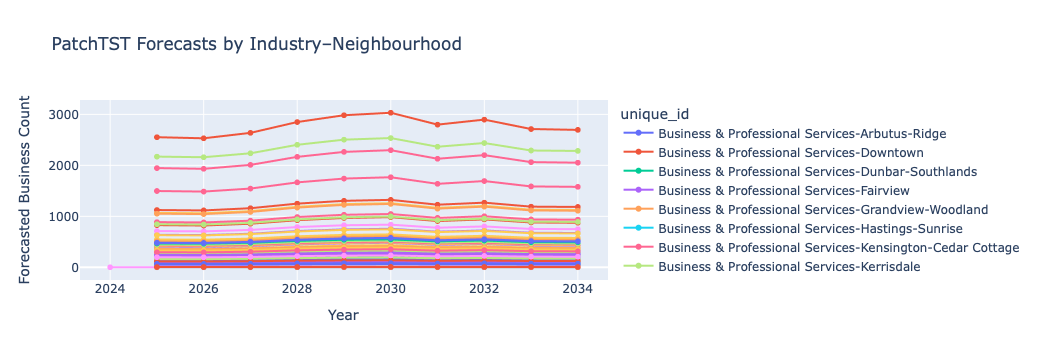

In [143]:
import pandas as pd
import plotly.express as px

dfff = future.copy()

dfff["year"] = pd.to_datetime(dfff["ds"]).dt.year

fig = px.line(
    dfff,
    x="year",
    y="PatchTST",
    color="unique_id",
    markers=True,
    title="PatchTST Forecasts by Industry–Neighbourhood",
    labels={"year": "Year", "PatchTST": "Forecasted Business Count"}
)

fig.show()

In [115]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.losses.pytorch import MSE

# Make clean df
final_df = df_grouped[['unique_id','ds','y']].copy()
final_df['unique_id'] = final_df['unique_id'].astype(str)
final_df['ds'] = pd.to_datetime(final_df['ds'])

H = 10   # horizon

model_nbeats = NBEATS(
    h=H,
    input_size=28,
    loss=MSE(),

    # Must be lists of the same length
    stack_types=['trend', 'seasonality'],
    n_blocks=[2, 2],

    # Must be list of tuples (in_dim, out_dim)
    mlp_units=[
        (256, 256),
        (256, 256),
    ],

    learning_rate=1e-3,
    start_padding_enabled=True,
)

# ❗ NO trainer_kwargs (your version doesn't allow it)
fcst_nbeats = NeuralForecast(
    models=[model_nbeats],
    freq='Y'
)

fcst_nbeats.fit(final_df)
future_nbeats = fcst_nbeats.predict()

print(future_nbeats.head())


Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MSE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 579 K  | train
-------------------------------------------------------
577 K     Trainable params
1.6 K     Non-trainable params
579 K     Total params
2.317     Total estimated model params size (MB)
36        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/utilsforecast/processing.py:378: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/utilsforecast/processing.py:434: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Predicting: |                                             | 0/? [00:00<?, ?it/s]

                                        unique_id         ds     NBEATS
0  Business & Professional Services-Arbutus-Ridge 2025-12-31  61.344475
1  Business & Professional Services-Arbutus-Ridge 2026-12-31  57.015587
2  Business & Professional Services-Arbutus-Ridge 2027-12-31  58.134529
3  Business & Professional Services-Arbutus-Ridge 2028-12-31  57.675777
4  Business & Professional Services-Arbutus-Ridge 2029-12-31  56.581547


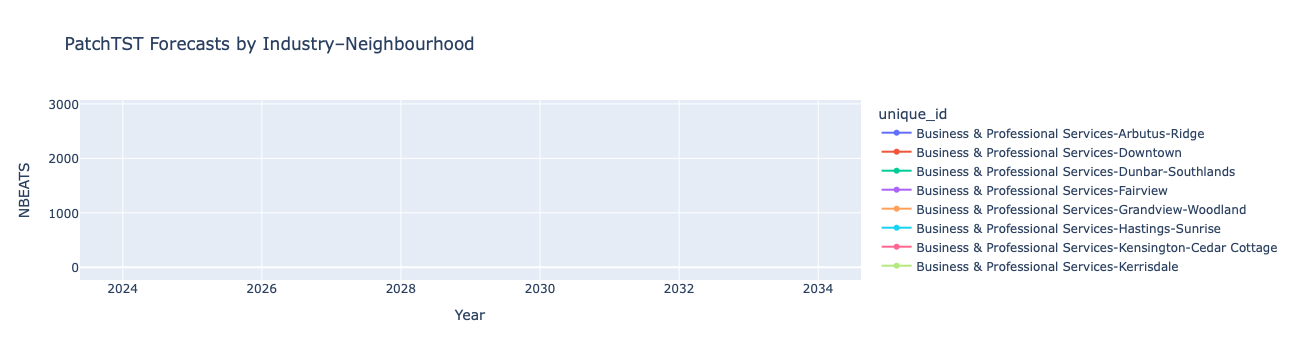

In [116]:
import pandas as pd
import plotly.express as px

dfff = future_nbeats.copy()

dfff["year"] = pd.to_datetime(dfff["ds"]).dt.year

fig = px.line(
    dfff,
    x="year",
    y="NBEATS",
    color="unique_id",
    markers=True,
    title="PatchTST Forecasts by Industry–Neighbourhood",
    labels={"year": "Year", "PatchTST": "Forecasted Business Count"}
)

fig.show()

In [144]:
def create_lgbm_features(df):
    df = df.copy()
    df['year'] = df['ds'].dt.year
    
    # --- SAFE lag features (annual data) ---
    df['lag_1'] = df.groupby('unique_id')['y'].shift(1)
    df['lag_2'] = df.groupby('unique_id')['y'].shift(2)

    # --- SAFE rolling features (must use min_periods=1) ---
    df['roll_mean_2'] = (
        df.groupby('unique_id')['y']
        .shift(1)
        .rolling(2, min_periods=1)
        .mean()
    )
    df['roll_std_2'] = (
        df.groupby('unique_id')['y']
        .shift(1)
        .rolling(2, min_periods=1)
        .std()
        .fillna(0)  # standard deviation for 1 value = NaN → replace with 0
    )
    
    # --- COVID flags ---
    df['covid_2020'] = (df['year'] == 2020).astype(int)
    df['covid_2021'] = (df['year'] == 2021).astype(int)

    # --- Growth indicator ---
    df['yoy_growth'] = df.groupby('unique_id')['y'].pct_change()

    # --- Encode unique_id ---
    df['unique_id_cat'] = df['unique_id'].astype('category').cat.codes

    return df


In [145]:
lgbm_df = create_lgbm_features(final_df)
print(lgbm_df.columns)


Index(['unique_id', 'ds', 'y', 'year', 'lag_1', 'lag_2', 'roll_mean_2',
       'roll_std_2', 'covid_2020', 'covid_2021', 'yoy_growth',
       'unique_id_cat'],
      dtype='object')


In [147]:
train_df = lgbm_df.dropna(subset=['lag_1'])

from sklearn.model_selection import train_test_split

train, valid = train_test_split(
    train_df,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

print(train.shape, valid.shape)

train_set = lgb.Dataset(train[FEATURES], label=train[TARGET])
valid_set = lgb.Dataset(valid[FEATURES], label=valid[TARGET])

from lightgbm import early_stopping, log_evaluation

params = {
    'objective': 'poisson',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'rmse'
}

lgb_model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    num_boost_round=2000,
    callbacks=[
        early_stopping(200),
        log_evaluation(period=50)
    ]
)


(224, 12) (56, 12)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 4
[LightGBM] [Info] Start training from score 5.147391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [152]:
FEATURES = ['unique_id_cat', 'lag_1', 'yoy_growth']
TARGET = 'y'

In [153]:
train_df = lgbm_df.dropna(subset=['lag_1'])

from sklearn.model_selection import train_test_split

train, valid = train_test_split(
    train_df,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

In [155]:
!pip install catboost
from catboost import CatBoostRegressor, Pool

# Declare categorical features by *index*, not name
cat_features = [FEATURES.index('unique_id_cat')]

train_pool = Pool(train[FEATURES], label=train[TARGET], cat_features=cat_features)
valid_pool = Pool(valid[FEATURES], label=valid[TARGET], cat_features=cat_features)

cat_model = CatBoostRegressor(
    loss_function='RMSE',
    depth=8,
    learning_rate=0.05,
    iterations=3000,
    random_seed=42,
    l2_leaf_reg=3,
    od_type='Iter',
    od_wait=200,
    verbose=100
)

cat_model.fit(train_pool, eval_set=valid_pool)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 10.4 MB/s  0:00:020.7 MB/s eta 0:00:01:01
0:	learn: 331.6377230	test: 223.3267599	best: 223.3267599 (0)	total: 59ms	remaining: 2m 56s
100:	learn: 48.2148411	test: 32.1251254	best: 32.1251254 (100)	total: 158ms	remaining: 4.54s
200:	learn: 15.5633234	test: 26.4290589	best: 26.4290589 (200)	total: 244ms	remaining: 3.4s
300:	learn: 6.3557362	test: 24.3923947	best: 24.3805266 (299)	total: 338ms	remaining: 3.03s
400:	learn: 3.6649150	test: 23.5482716	best: 23.5482716 (400)	total: 429ms	remaining: 2.78s
500:	learn: 2.5991582	test: 23.3325807	best: 23.3258735 (494)	total: 532ms	remaining: 2.65s
600:	learn: 1.8958972	test: 23.4571029	best: 23.3194511 (503)	total: 636ms	remaining: 2.54s
700:	learn: 1.5094376	test: 23.4818109	best: 23.3194511 (503)	total: 741ms	remaining: 2.43s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 23.3194511
bestIteration = 503

Shrink model to first 504 iterations.


In [156]:
feat_imp = cat_model.get_feature_importance(train_pool)
pd.DataFrame({"feature": FEATURES, "importance": feat_imp})

,feature,importance
0,unique_id_cat,0.000000
1,lag_1,94.718663
2,yoy_growth,5.281337


In [158]:
def forecast_catboost_for_id(cat_model, df, unique_id, horizon=10):
    """
    Recursively forecast future values for one unique_id series using CatBoost.
    df must contain: ['unique_id', 'y', 'lag_1', 'yoy_growth', 'unique_id_cat']
    """
    # Filter this series
    sdf = df[df['unique_id'] == unique_id].sort_values('ds').copy()

    # Start from last known row
    last = sdf.iloc[-1].copy()

    preds = []
    for step in range(horizon):

        # Build input row (only the features)
        row = pd.DataFrame([{
            'unique_id_cat': last['unique_id_cat'],
            'lag_1': last['y'],                     # last y → lag_1
            'yoy_growth': last['yoy_growth'],       # last recorded growth (fallback)
        }])

        # Predict next value
        yhat = cat_model.predict(row)[0]
        preds.append(yhat)

        # Update "last" row for next iteration
        next_row = last.copy()
        next_row['y'] = yhat
        next_row['lag_1'] = yhat
        next_row['yoy_growth'] = (
            (yhat / last['y']) - 1 if last['y'] != 0 else 0
        )

        last = next_row

    return preds


In [159]:
unique_ids = lgbm_df['unique_id'].unique()
H = 10   # forecasting horizon

all_forecasts = []

for uid in unique_ids:
    preds = forecast_catboost_for_id(cat_model, lgbm_df, uid, horizon=H)

    # Build output DF
    out = pd.DataFrame({
        'unique_id': uid,
        'h': range(1, H+1),
        'catboost_yhat': preds
    })
    all_forecasts.append(out)

catboost_future = pd.concat(all_forecasts, ignore_index=True)


In [160]:
catboost_future

,unique_id,h,catboost_yhat
0,Business & Professional Services-Arbutus-Ridge,1,51.975671
1,Business & Professional Services-Arbutus-Ridge,2,49.442301
2,Business & Professional Services-Arbutus-Ridge,3,49.033475
3,Business & Professional Services-Arbutus-Ridge,4,50.645311
4,Business & Professional Services-Arbutus-Ridge,5,54.403606
...,...,...,...
2815,Technology & Digital-West Point Grey,6,16.597326
2816,Technology & Digital-West Point Grey,7,19.430734
2817,Technology & Digital-West Point Grey,8,23.296093
2818,Technology & Digital-West Point Grey,9,27.260495


In [161]:
from catboost import CatBoostRegressor, Pool
import random

param_grid = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.03, 0.05, 0.07],
    "l2_leaf_reg": [1, 3, 5, 7, 10, 20],
    "bagging_temperature": [0, 0.5, 1, 2, 5],
    "random_strength": [0.1, 0.5, 1, 2],
}

def sample_params():
    return {
        "depth": random.choice(param_grid["depth"]),
        "learning_rate": random.choice(param_grid["learning_rate"]),
        "l2_leaf_reg": random.choice(param_grid["l2_leaf_reg"]),
        "bagging_temperature": random.choice(param_grid["bagging_temperature"]),
        "random_strength": random.choice(param_grid["random_strength"]),
    }

cat_features = [FEATURES.index('unique_id_cat')]

best_score = float("inf")
best_params = None

for trial in range(25):    # ← run 25 trials (fast)
    params = sample_params()
    
    model = CatBoostRegressor(
        loss_function="RMSE",
        iterations=3000,
        od_type="Iter",
        od_wait=200,
        random_seed=42,
        **params
    )
    
    model.fit(
        train_pool,
        eval_set=valid_pool,
        verbose=False
    )
    
    score = model.get_best_score()["validation"]["RMSE"]
    print(f"Trial {trial+1}, RMSE={score:.4f}, params={params}")
    
    if score < best_score:
        best_score = score
        best_params = params

print("\nBest RMSE:", best_score)
print("Best Params:", best_params)


Trial 1, RMSE=30.4166, params={'depth': 10, 'learning_rate': 0.07, 'l2_leaf_reg': 20, 'bagging_temperature': 2, 'random_strength': 0.5}
Trial 2, RMSE=11.6288, params={'depth': 4, 'learning_rate': 0.07, 'l2_leaf_reg': 1, 'bagging_temperature': 2, 'random_strength': 2}
Trial 3, RMSE=12.9566, params={'depth': 4, 'learning_rate': 0.07, 'l2_leaf_reg': 5, 'bagging_temperature': 0.5, 'random_strength': 0.1}
Trial 4, RMSE=29.4260, params={'depth': 8, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'bagging_temperature': 0, 'random_strength': 0.1}
Trial 5, RMSE=32.9475, params={'depth': 10, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 0, 'random_strength': 0.5}
Trial 6, RMSE=39.7034, params={'depth': 10, 'learning_rate': 0.07, 'l2_leaf_reg': 10, 'bagging_temperature': 0.5, 'random_strength': 1}
Trial 7, RMSE=20.2876, params={'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'bagging_temperature': 1, 'random_strength': 0.1}
Trial 8, RMSE=39.7407, params={'depth': 10, 'learning_rat

In [162]:
final_cat_model = CatBoostRegressor(
    loss_function="RMSE",
    iterations=3000,
    od_type="Iter",
    od_wait=200,
    random_seed=42,
    **best_params
)

final_cat_model.fit(train_pool, eval_set=valid_pool, verbose=100)


0:	learn: 325.8719116	test: 220.7599967	best: 220.7599967 (0)	total: 1.68ms	remaining: 5.04s
100:	learn: 18.3588673	test: 16.5249822	best: 16.5249822 (100)	total: 35.7ms	remaining: 1.02s
200:	learn: 6.1742409	test: 12.1106113	best: 12.1106113 (200)	total: 61.5ms	remaining: 857ms
300:	learn: 3.7641294	test: 11.0694560	best: 11.0694560 (300)	total: 91.8ms	remaining: 823ms
400:	learn: 2.8272660	test: 10.8056837	best: 10.8056837 (400)	total: 135ms	remaining: 873ms
500:	learn: 2.3006494	test: 10.5827236	best: 10.5827236 (500)	total: 173ms	remaining: 862ms
600:	learn: 1.8881262	test: 10.5140612	best: 10.5077393 (590)	total: 207ms	remaining: 827ms
700:	learn: 1.5625010	test: 10.4777957	best: 10.4727656 (678)	total: 237ms	remaining: 778ms
800:	learn: 1.3486488	test: 10.4406838	best: 10.4250468 (763)	total: 267ms	remaining: 734ms
900:	learn: 1.1712729	test: 10.4065846	best: 10.4065532 (897)	total: 297ms	remaining: 692ms
1000:	learn: 1.0127079	test: 10.3992601	best: 10.3987123 (998)	total: 327ms

In [208]:
unique_ids = lgbm_df['unique_id'].unique()
H = 10   # forecast next 10 years

all_forecasts = []

for uid in unique_ids:
    preds = forecast_catboost_for_id(final_cat_model, lgbm_df, uid, horizon=H)

    out = pd.DataFrame({
        'unique_id': uid,
        'h': np.arange(1, H+1),
        'catboost_yhat': preds
    })
    
    all_forecasts.append(out)

catboost_future = pd.concat(all_forecasts, ignore_index=True)


In [210]:
last_year = lgbm_df['ds'].dt.year.max()
catboost_future['year'] = last_year + catboost_future['h']


In [211]:
catboost_future

,unique_id,h,catboost_yhat,year
0,Business & Professional Services-Arbutus-Ridge,1,52.076146,2026
1,Business & Professional Services-Arbutus-Ridge,2,45.370254,2027
2,Business & Professional Services-Arbutus-Ridge,3,40.665626,2028
3,Business & Professional Services-Arbutus-Ridge,4,36.213578,2029
4,Business & Professional Services-Arbutus-Ridge,5,30.720328,2030
...,...,...,...,...
2815,Technology & Digital-West Point Grey,6,40.954870,2031
2816,Technology & Digital-West Point Grey,7,54.347467,2032
2817,Technology & Digital-West Point Grey,8,69.211848,2033
2818,Technology & Digital-West Point Grey,9,80.963600,2034


In [177]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 11.3 MB/s  0:00:01 11.6 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [statsforecast]m 5/6 [statsforecast]


In [182]:
from statsforecast import StatsForecast
from statsforecast.models import Theta, Naive

# 1. Main classical model
theta = Theta(season_length=1)      # main model

# 2. Tiny-dataset-safe fallback
naive = Naive()                     # ALWAYS works

# 3. Run StatsForecast
sf = StatsForecast(
    models=[theta],
    fallback_model=naive,
    freq='Y',
    n_jobs=-1
)

sf.fit(final_df)     # final_df: ['unique_id', 'ds', 'y']

# 4. Forecast
H = 10
theta_future = sf.predict(h=H)

theta_future["year"] = pd.to_datetime(theta_future["ds"]).dt.year
theta_future.head()

/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/utilsforecast/processing.py:378: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/opt/miniconda3/envs/env_eosc410/lib/python3.13/site-packages/utilsforecast/processing.py:434: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



,unique_id,ds,Theta,year
0,Business & Professional Services-Arbutus-Ridge,2025-12-31,60.0,2025
1,Business & Professional Services-Arbutus-Ridge,2026-12-31,60.0,2026
2,Business & Professional Services-Arbutus-Ridge,2027-12-31,60.0,2027
3,Business & Professional Services-Arbutus-Ridge,2028-12-31,60.0,2028
4,Business & Professional Services-Arbutus-Ridge,2029-12-31,60.0,2029


In [185]:
theta_future

,unique_id,ds,Theta,year
0,Business & Professional Services-Arbutus-Ridge,2025-12-31,60.0,2025
1,Business & Professional Services-Arbutus-Ridge,2026-12-31,60.0,2026
2,Business & Professional Services-Arbutus-Ridge,2027-12-31,60.0,2027
3,Business & Professional Services-Arbutus-Ridge,2028-12-31,60.0,2028
4,Business & Professional Services-Arbutus-Ridge,2029-12-31,60.0,2029
...,...,...,...,...
2815,Technology & Digital-West Point Grey,2030-12-31,6.0,2030
2816,Technology & Digital-West Point Grey,2031-12-31,6.0,2031
2817,Technology & Digital-West Point Grey,2032-12-31,6.0,2032
2818,Technology & Digital-West Point Grey,2033-12-31,6.0,2033


In [186]:
future

,unique_id,ds,PatchTST
0,Business & Professional Services-Arbutus-Ridge,2025-12-31,55.198486
1,Business & Professional Services-Arbutus-Ridge,2026-12-31,54.701157
2,Business & Professional Services-Arbutus-Ridge,2027-12-31,57.069340
3,Business & Professional Services-Arbutus-Ridge,2028-12-31,61.735806
4,Business & Professional Services-Arbutus-Ridge,2029-12-31,64.680061
...,...,...,...
2815,Technology & Digital-West Point Grey,2030-12-31,6.591789
2816,Technology & Digital-West Point Grey,2031-12-31,6.061228
2817,Technology & Digital-West Point Grey,2032-12-31,6.283428
2818,Technology & Digital-West Point Grey,2033-12-31,5.875148


In [187]:
future_nbeats

,unique_id,ds,NBEATS
0,Business & Professional Services-Arbutus-Ridge,2025-12-31,61.344475
1,Business & Professional Services-Arbutus-Ridge,2026-12-31,57.015587
2,Business & Professional Services-Arbutus-Ridge,2027-12-31,58.134529
3,Business & Professional Services-Arbutus-Ridge,2028-12-31,57.675777
4,Business & Professional Services-Arbutus-Ridge,2029-12-31,56.581547
...,...,...,...
2815,Technology & Digital-West Point Grey,2030-12-31,5.763030
2816,Technology & Digital-West Point Grey,2031-12-31,5.308855
2817,Technology & Digital-West Point Grey,2032-12-31,5.573114
2818,Technology & Digital-West Point Grey,2033-12-31,5.581252


In [189]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [191]:
def try_fit(model_fn):
    """Try to fit a model; return None if it fails."""
    try:
        return model_fn()
    except Exception as e:
        return None

def rmse(y_true, y_pred):
    """Root mean squared error."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def forecast_best_model(df_id, uid=None, horizon=10, verbose=False):
    """
    Select best classical model (Theta-like, Holt, ARIMA, Naive)
    for a single unique_id based on RMSE on a small holdout.
    """
    df_id = df_id.sort_values("ds")
    y = df_id["y"].values

    # If we literally have only 1 point → only Naive is possible
    if len(y) == 1:
        future = [y[0]] * horizon
        if verbose:
            print(f"{uid}: only 1 point → using Naive only")
        rmse_dict = {"Naive": 0.0}
        return future, "Naive", rmse_dict

    # ---- Train / validation split ----
    # If we have >=4 points, use last 2 for validation; else last 1
    if len(y) >= 4:
        train = y[:-2]
        valid = y[-2:]
    else:
        train = y[:-1]
        valid = y[-1:]

    results = {}

    # -------------------------------------------------
    # Model 1: Naive (always works)
    # -------------------------------------------------
    naive_valid = np.repeat(train[-1], len(valid))
    results["Naive"] = {
        "rmse": rmse(valid, naive_valid),
        "model": None,
    }

    # -------------------------------------------------
    # Model 2: Holt (additive trend)
    # -------------------------------------------------
    if len(train) >= 2:
        holt_model = try_fit(lambda: Holt(train).fit(optimized=True))
        if holt_model is not None:
            holt_pred = holt_model.forecast(len(valid))
            results["Holt"] = {
                "rmse": rmse(valid, holt_pred),
                "model": holt_model,
            }

    # -------------------------------------------------
    # Model 3: ARIMA(1,1,1)
    # -------------------------------------------------
    if len(train) >= 3:
        arima_model = try_fit(lambda: ARIMA(train, order=(1, 1, 1)).fit())
        if arima_model is not None:
            arima_pred = arima_model.forecast(len(valid))
            results["ARIMA"] = {
                "rmse": rmse(valid, arima_pred),
                "model": arima_model,
            }

    # -------------------------------------------------
    # Model 4: Theta-like (SES + linear trend)
    # -------------------------------------------------
    if len(train) >= 2:
        alpha = 0.5
        level = train[0]
        for t in train[1:]:
            level = alpha * t + (1 - alpha) * level

        x = np.arange(len(train))
        slope = np.polyfit(x, train, 1)[0]

        theta_valid = [level + slope * (len(train) + i) for i in range(len(valid))]
        results["Theta"] = {
            "rmse": rmse(valid, theta_valid),
            "model": (level, slope),
        }

    # -------------------------------------------------
    # Choose best by RMSE
    # -------------------------------------------------
    best_name, best_info = min(results.items(), key=lambda kv: kv[1]["rmse"])
    best_model = best_info["model"]

    # Verbose print of all RMSEs for this series
    rmse_dict = {name: info["rmse"] for name, info in results.items()}
    if verbose:
        rmse_str = ", ".join(f"{m}: {v:.3f}" for m, v in rmse_dict.items())
        print(f"{uid}: {rmse_str} → best = {best_name}")

    # -------------------------------------------------
    # Forecast future with best model
    # -------------------------------------------------
    if best_name == "Naive":
        future = [y[-1]] * horizon

    elif best_name == "Holt":
        future = best_model.forecast(horizon)

    elif best_name == "ARIMA":
        future = best_model.forecast(horizon)

    elif best_name == "Theta":
        level, slope = best_model
        future = [level + slope * (len(train) + i) for i in range(horizon)]
    else:
        future = [y[-1]] * horizon  # safety

    return future, best_name, rmse_dict

def classical_forecast_all(df, horizon=10, verbose=False):
    all_forecasts = []
    all_rmse_rows = []

    for uid in df["unique_id"].unique():
        df_id = df[df["unique_id"] == uid]

        preds, best_name, rmse_dict = forecast_best_model(
            df_id, uid=uid, horizon=horizon, verbose=verbose
        )

        # Years for future ds
        last_year = df_id["ds"].dt.year.max()
        future_years = np.arange(last_year + 1, last_year + 1 + horizon)
        future_ds = pd.to_datetime(future_years.astype(str) + "-12-31")

        out = pd.DataFrame({
            "unique_id": uid,
            "ds": future_ds,
            "year": future_years,
            "classical_yhat": preds,
            "classical_model_used": best_name,
        })
        all_forecasts.append(out)

        # Store RMSEs for analysis
        rmse_row = {"unique_id": uid}
        rmse_row.update({f"rmse_{m}": v for m, v in rmse_dict.items()})
        rmse_row["best_model"] = best_name
        all_rmse_rows.append(rmse_row)

    classical_future = pd.concat(all_forecasts, ignore_index=True)
    classical_rmse = pd.DataFrame(all_rmse_rows)

    return classical_future, classical_rmse


In [192]:
classical_future, classical_rmse = classical_forecast_all(
    final_df, horizon=10, verbose=True
)


Business & Professional Services-Arbutus-Ridge: Naive: 8.000 → best = Naive
Business & Professional Services-Downtown: Naive: 283.000 → best = Naive
Business & Professional Services-Dunbar-Southlands: Naive: 14.000 → best = Naive
Business & Professional Services-Fairview: Naive: 49.000 → best = Naive
Business & Professional Services-Grandview-Woodland: Naive: 14.000 → best = Naive
Business & Professional Services-Hastings-Sunrise: Naive: 18.000 → best = Naive
Business & Professional Services-Kensington-Cedar Cottage: Naive: 13.000 → best = Naive
Business & Professional Services-Kerrisdale: Naive: 9.000 → best = Naive
Business & Professional Services-Killarney: Naive: 9.000 → best = Naive
Business & Professional Services-Kitsilano: Naive: 34.000 → best = Naive
Business & Professional Services-Marpole: Naive: 8.000 → best = Naive
Business & Professional Services-Mount Pleasant: Naive: 40.000 → best = Naive
Business & Professional Services-Oakridge: Naive: 10.000 → best = Naive
Business &

In [193]:
import pandas as pd

def naive_forecast_for_id(df, uid, horizon=10):
    """Return h-step naive forecast for one unique_id."""
    sub = df[df['unique_id'] == uid].sort_values('ds')

    if len(sub) == 0:
        raise ValueError(f"No data found for {uid}")

    last_y = sub['y'].iloc[-1]

    # Create future dates (annual)
    last_year = sub['ds'].dt.year.max()
    future_years = list(range(last_year + 1, last_year + 1 + horizon))

    out = pd.DataFrame({
        'unique_id': uid,
        'ds': pd.to_datetime([f"{y}-12-31" for y in future_years]),
        'naive_yhat': last_y,
        'year': future_years
    })
    return out


# --------------------------------------------------------
# RUN NAIVE FORECAST FOR ALL unique_id
# --------------------------------------------------------

unique_ids = final_df['unique_id'].unique()
H = 10

all_naive_forecasts = []

for uid in unique_ids:
    preds = naive_forecast_for_id(final_df, uid, horizon=H)
    all_naive_forecasts.append(preds)

naive_future = pd.concat(all_naive_forecasts, ignore_index=True)

naive_future.head()


,unique_id,ds,naive_yhat,year
0,Business & Professional Services-Arbutus-Ridge,2026-12-31,60,2026
1,Business & Professional Services-Arbutus-Ridge,2027-12-31,60,2027
2,Business & Professional Services-Arbutus-Ridge,2028-12-31,60,2028
3,Business & Professional Services-Arbutus-Ridge,2029-12-31,60,2029
4,Business & Professional Services-Arbutus-Ridge,2030-12-31,60,2030


In [194]:
naive_future

,unique_id,ds,naive_yhat,year
0,Business & Professional Services-Arbutus-Ridge,2026-12-31,60,2026
1,Business & Professional Services-Arbutus-Ridge,2027-12-31,60,2027
2,Business & Professional Services-Arbutus-Ridge,2028-12-31,60,2028
3,Business & Professional Services-Arbutus-Ridge,2029-12-31,60,2029
4,Business & Professional Services-Arbutus-Ridge,2030-12-31,60,2030
...,...,...,...,...
2815,Technology & Digital-West Point Grey,2031-12-31,6,2031
2816,Technology & Digital-West Point Grey,2032-12-31,6,2032
2817,Technology & Digital-West Point Grey,2033-12-31,6,2033
2818,Technology & Digital-West Point Grey,2034-12-31,6,2034


In [199]:
# import numpy as np
# import pandas as pd

# def smape(y_true, y_pred):
#     return np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2 + 1e-9))


In [202]:
naive_future.columns

Index(['unique_id', 'ds', 'naive_yhat', 'year'], dtype='object')

In [212]:
import pandas as pd
import numpy as np

# 1. Ensure naive_future is sorted and has a horizon index per unique_id
naive_future = naive_future.sort_values(['unique_id', 'ds']).copy()
naive_future['h'] = naive_future.groupby('unique_id').cumcount() + 1  # 1..H

# 2. Merge CatBoost's h onto the same future dates (ds) per unique_id
catboost_future = catboost_future.merge(
    naive_future[['unique_id', 'h', 'ds']],
    on=['unique_id', 'h'],
    how='left'
)



In [214]:
future_nbeats

,unique_id,ds,NBEATS
0,Business & Professional Services-Arbutus-Ridge,2025-12-31,61.344475
1,Business & Professional Services-Arbutus-Ridge,2026-12-31,57.015587
2,Business & Professional Services-Arbutus-Ridge,2027-12-31,58.134529
3,Business & Professional Services-Arbutus-Ridge,2028-12-31,57.675777
4,Business & Professional Services-Arbutus-Ridge,2029-12-31,56.581547
...,...,...,...
2815,Technology & Digital-West Point Grey,2030-12-31,5.763030
2816,Technology & Digital-West Point Grey,2031-12-31,5.308855
2817,Technology & Digital-West Point Grey,2032-12-31,5.573114
2818,Technology & Digital-West Point Grey,2033-12-31,5.581252


In [205]:
future.columns

Index(['unique_id', 'ds', 'PatchTST'], dtype='object')

In [213]:
catboost_future.head()

,unique_id,h,catboost_yhat,year,ds
0,Business & Professional Services-Arbutus-Ridge,1,52.076146,2026,2026-12-31
1,Business & Professional Services-Arbutus-Ridge,2,45.370254,2027,2027-12-31
2,Business & Professional Services-Arbutus-Ridge,3,40.665626,2028,2028-12-31
3,Business & Professional Services-Arbutus-Ridge,4,36.213578,2029,2029-12-31
4,Business & Professional Services-Arbutus-Ridge,5,30.720328,2030,2030-12-31


In [215]:
# Make compact versions of each forecast DF
naive_df = naive_future[['unique_id', 'ds', 'year', 'naive_yhat']].copy()

cb_df = catboost_future[['unique_id', 'ds', 'catboost_yhat']].copy()

patch_df = future[['unique_id', 'ds', 'PatchTST']].copy()

nbeats_df = future_nbeats[['unique_id', 'ds', 'NBEATS']].copy()

# Merge on unique_id + ds
ens_df = (
    naive_df
    .merge(cb_df,    on=['unique_id', 'ds'], how='left')
    .merge(patch_df, on=['unique_id', 'ds'], how='left')
    .merge(nbeats_df,on=['unique_id', 'ds'], how='left')
)

# Optional: fallback – if any model is missing for some ids, fill with naive
for col in ['catboost_yhat', 'PatchTST', 'NBEATS']:
    ens_df[col] = ens_df[col].fillna(ens_df['naive_yhat'])


In [216]:
w_naive  = 0.10
w_cb     = 0.30
w_patch  = 0.30
w_nbeats = 0.30

ens_df['ensemble_yhat'] = (
      w_naive  * ens_df['naive_yhat']
    + w_cb     * ens_df['catboost_yhat']
    + w_patch  * ens_df['PatchTST']
    + w_nbeats * ens_df['NBEATS']
)

final_ensemble = ens_df[['unique_id', 'ds', 'year',
                         'naive_yhat', 'catboost_yhat',
                         'PatchTST', 'NBEATS',
                         'ensemble_yhat']]


In [217]:
final_ensemble

,unique_id,ds,year,naive_yhat,catboost_yhat,PatchTST,NBEATS,ensemble_yhat
0,Business & Professional Services-Arbutus-Ridge,2026-12-31,2026,60,52.076146,54.701157,57.015587,55.137868
1,Business & Professional Services-Arbutus-Ridge,2027-12-31,2027,60,45.370254,57.069340,58.134529,54.172237
2,Business & Professional Services-Arbutus-Ridge,2028-12-31,2028,60,40.665626,61.735806,57.675777,54.023165
3,Business & Professional Services-Arbutus-Ridge,2029-12-31,2029,60,36.213578,64.680061,56.581547,53.242556
4,Business & Professional Services-Arbutus-Ridge,2030-12-31,2030,60,30.720328,65.784561,59.452679,52.787271
...,...,...,...,...,...,...,...,...
2815,Technology & Digital-West Point Grey,2031-12-31,2031,6,40.954870,6.061228,5.308855,16.297486
2816,Technology & Digital-West Point Grey,2032-12-31,2032,6,54.347467,6.283428,5.573114,20.461203
2817,Technology & Digital-West Point Grey,2033-12-31,2033,6,69.211848,5.875148,5.581252,24.800474
2818,Technology & Digital-West Point Grey,2034-12-31,2034,6,80.963600,5.831990,5.648277,28.333160


In [219]:
final_ensemble['BusinessType'] = (
    final_ensemble['unique_id']
        .astype(str)
        .str.extract(r'^(.*?)-')[0]
        .fillna(final_ensemble['unique_id'])
)


In [220]:
agg_bt_year = (
    final_ensemble
        .groupby(['BusinessType', 'year'])
        .agg(
            total_ensemble_yhat = ('ensemble_yhat', 'sum'),
            total_naive         = ('naive_yhat', 'sum'),
            total_catboost      = ('catboost_yhat', 'sum'),
            total_patchtst      = ('PatchTST', 'sum'),
            total_nbeats        = ('NBEATS', 'sum')
        )
        .reset_index()
        .sort_values(['BusinessType','year'])
)


In [221]:
agg_bt_year['ensemble_smooth'] = (
    agg_bt_year
        .groupby('BusinessType')['total_ensemble_yhat']
        .transform(lambda s: s.rolling(3, min_periods=1).mean())
)


In [242]:
agg_bt_year_clean = agg_bt_year[agg_bt_year['year'] >= 2026].copy()


In [244]:
agg_bt_year_clean.columns


Index(['BusinessType', 'year', 'total_ensemble_yhat', 'total_naive',
       'total_catboost', 'total_patchtst', 'total_nbeats', 'ensemble_smooth'],
      dtype='object')

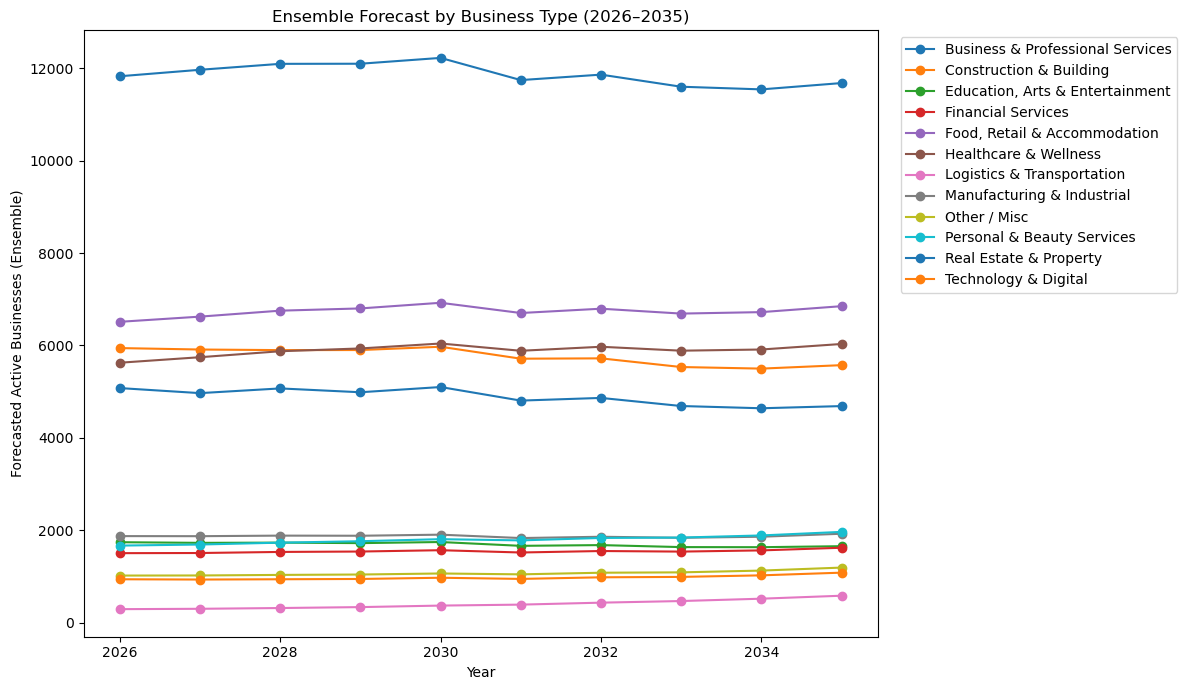

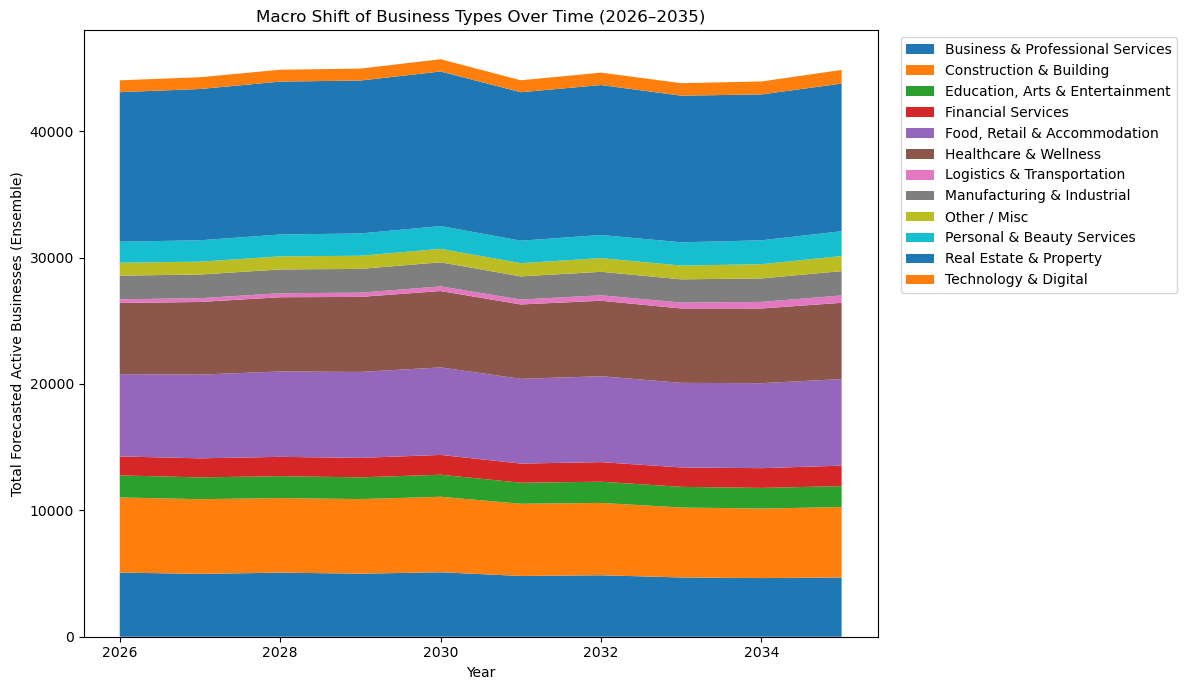

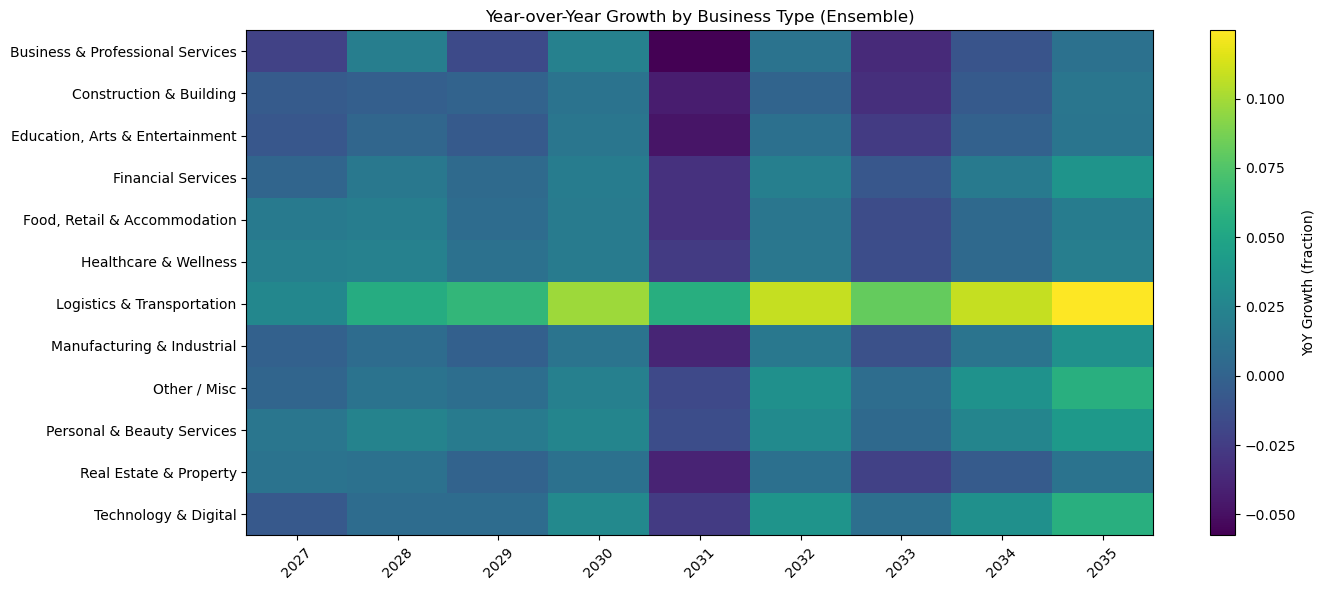

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use your real aggregated dataframe
df = agg_bt_year_clean.copy()

# Make sure it's sorted
df = df.sort_values(['BusinessType', 'year'])

# =========================
# 1) Line chart per BusinessType
# =========================
pivot_line = df.pivot_table(
    index='year',
    columns='BusinessType',
    values='total_ensemble_yhat',
    aggfunc='sum'
)

plt.figure(figsize=(12,7))
for col in pivot_line.columns:
    plt.plot(pivot_line.index, pivot_line[col], marker='o', label=col)

plt.xlabel("Year")
plt.ylabel("Forecasted Active Businesses (Ensemble)")
plt.title("Ensemble Forecast by Business Type (2026–2035)")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
plt.show()

# =========================
# 2) Stacked area chart (macro composition)
# =========================
pivot_area = pivot_line.copy()

plt.figure(figsize=(12,7))
plt.stackplot(pivot_area.index, pivot_area.T.values, labels=pivot_area.columns)
plt.xlabel("Year")
plt.ylabel("Total Forecasted Active Businesses (Ensemble)")
plt.title("Macro Shift of Business Types Over Time (2026–2035)")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
plt.show()

# =========================
# 3) Heatmap of YoY growth per BusinessType
# =========================
growth_df = df.copy()
growth_df['yoy_growth'] = growth_df.groupby('BusinessType')['total_ensemble_yhat'].pct_change()

pivot_heat = growth_df.pivot_table(
    index='BusinessType',
    columns='year',
    values='yoy_growth',
    aggfunc='mean'
)

plt.figure(figsize=(14,6))
im = plt.imshow(pivot_heat.values, aspect='auto', interpolation='nearest')
plt.colorbar(im, label="YoY Growth (fraction)")

plt.yticks(
    ticks=np.arange(len(pivot_heat.index)),
    labels=pivot_heat.index
)
plt.xticks(
    ticks=np.arange(len(pivot_heat.columns)),
    labels=pivot_heat.columns,
    rotation=45
)

plt.title("Year-over-Year Growth by Business Type (Ensemble)")
plt.tight_layout()
plt.show()


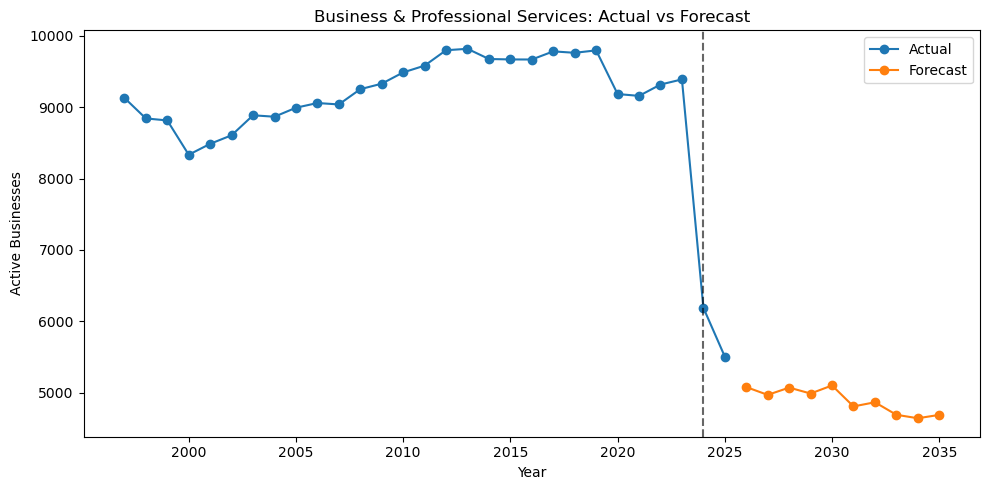

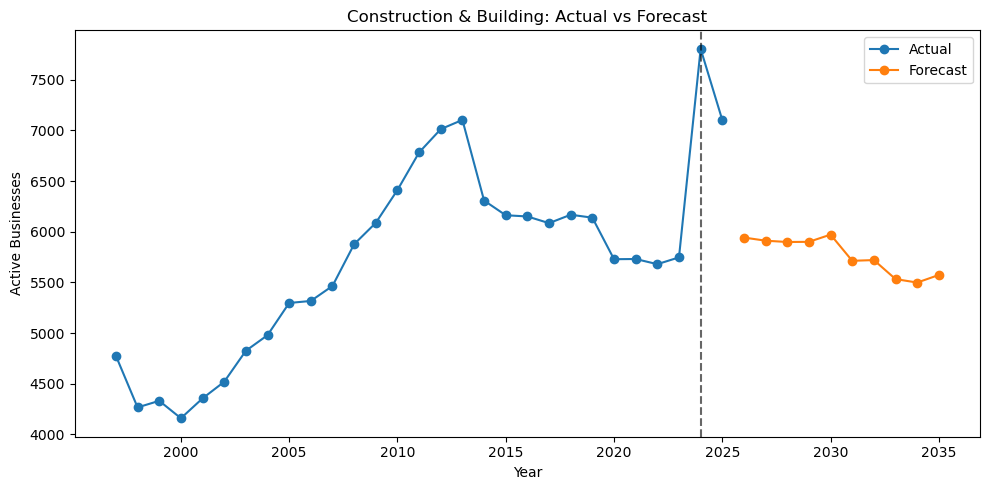

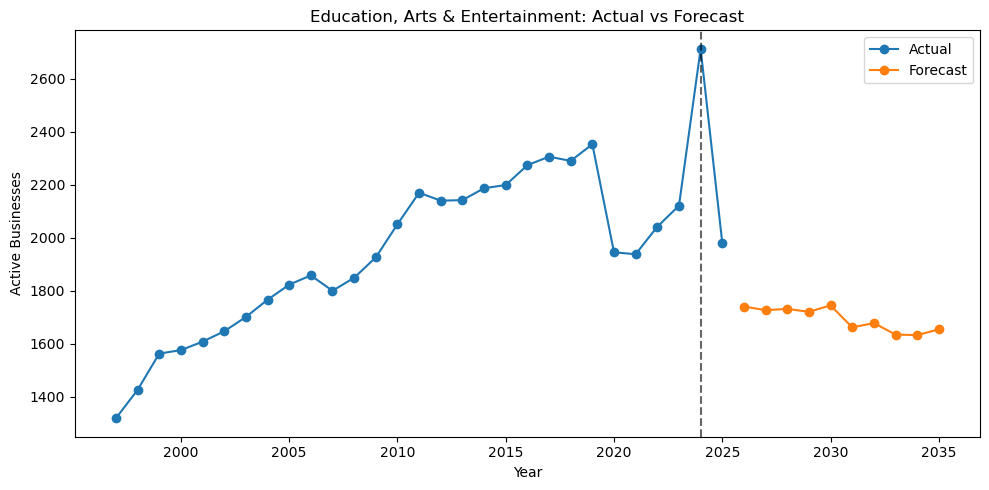

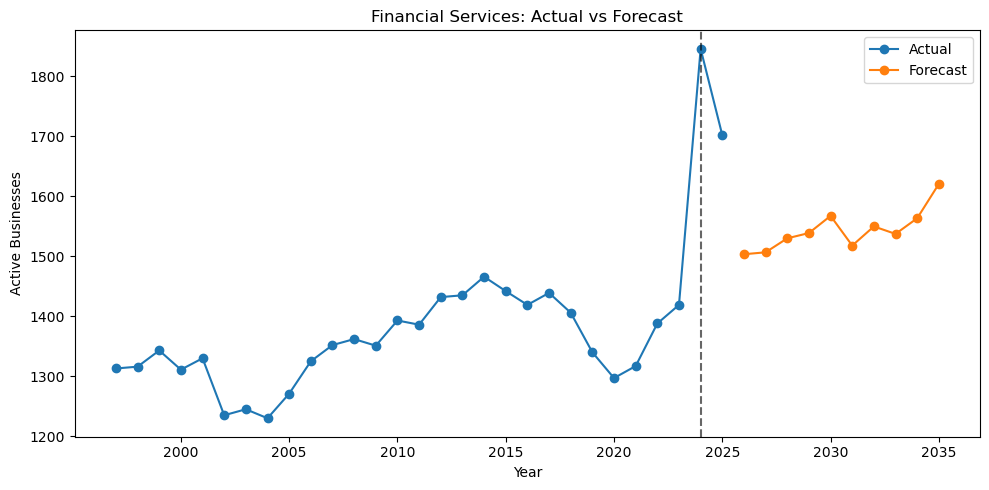

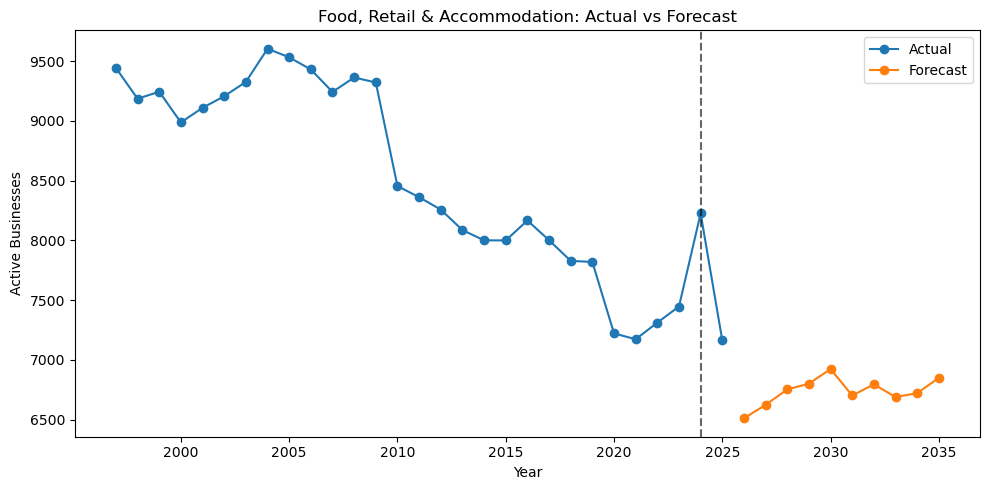

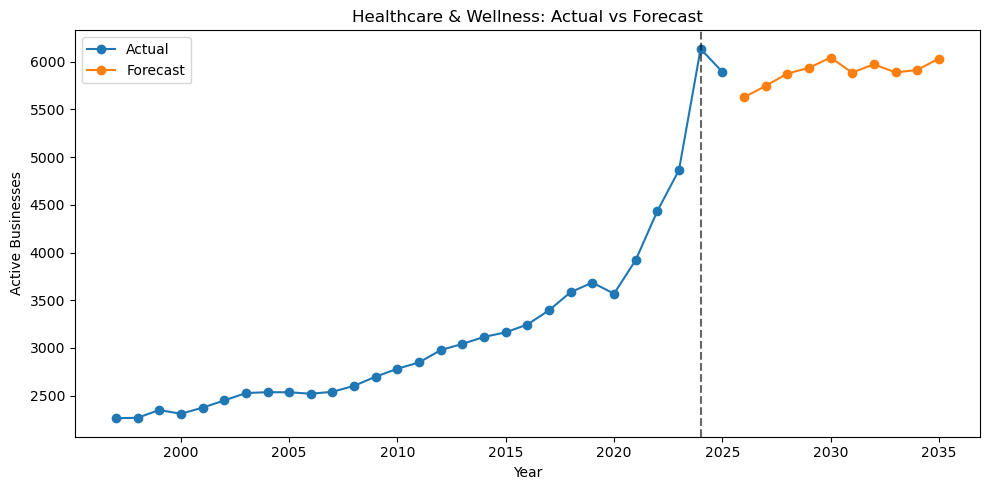

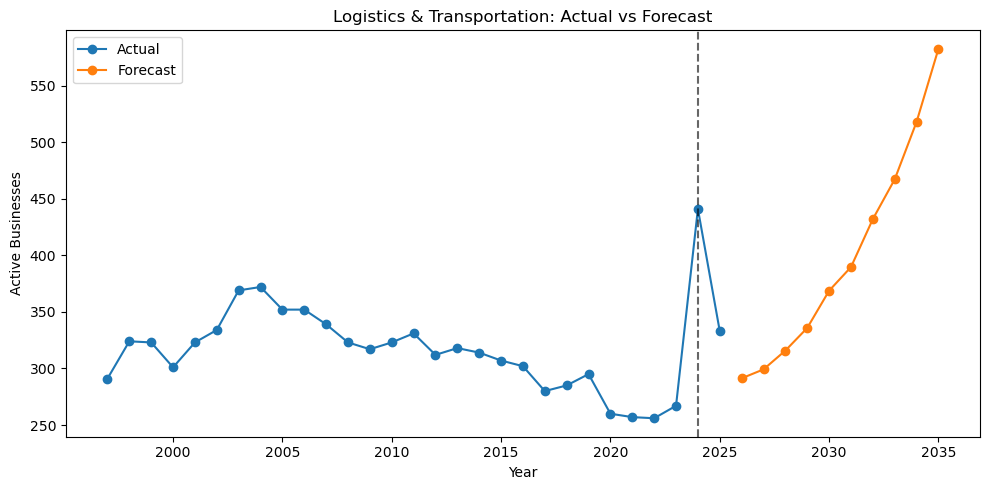

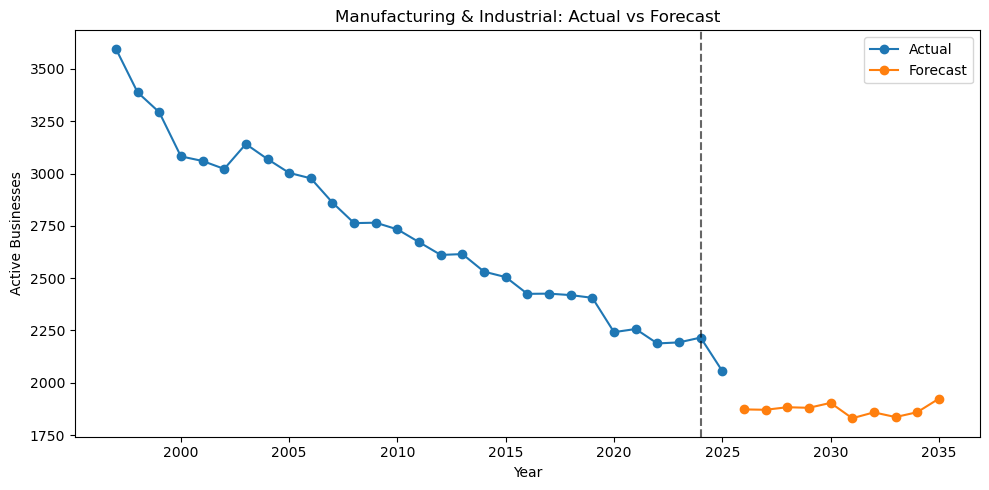

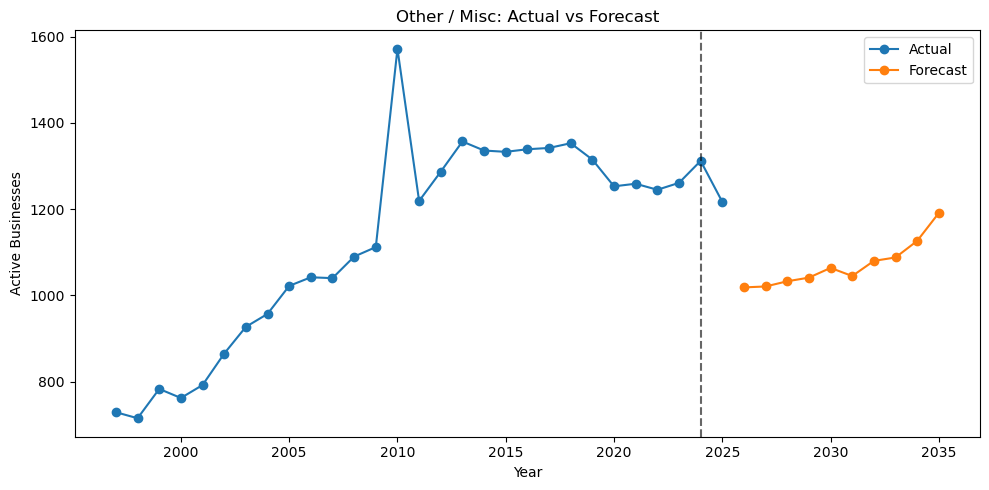

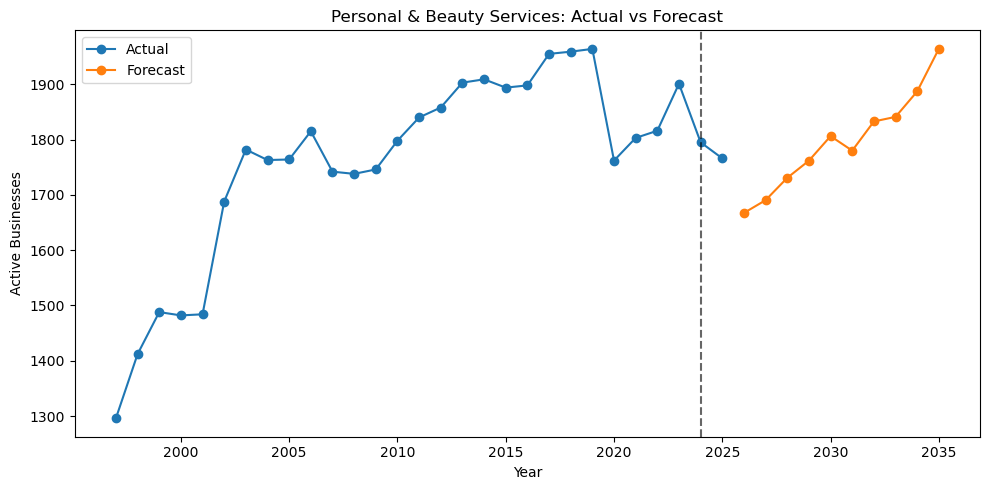

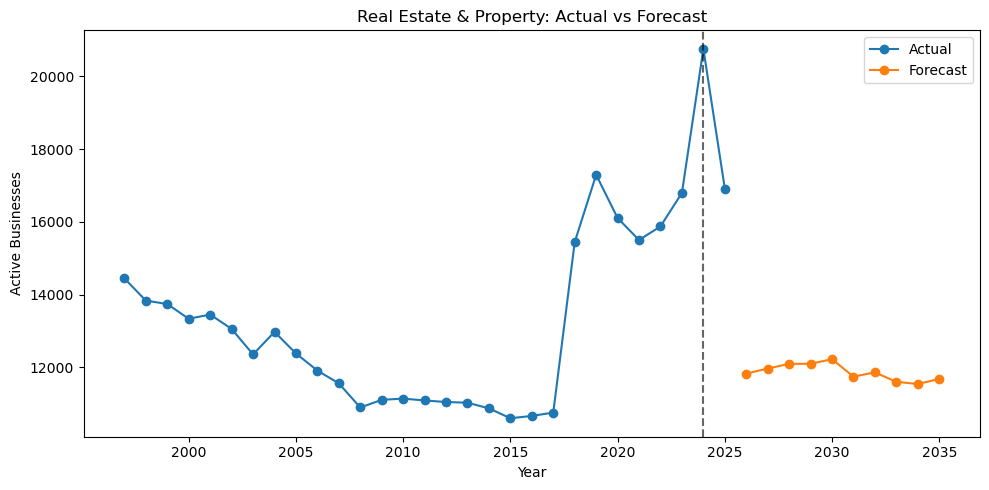

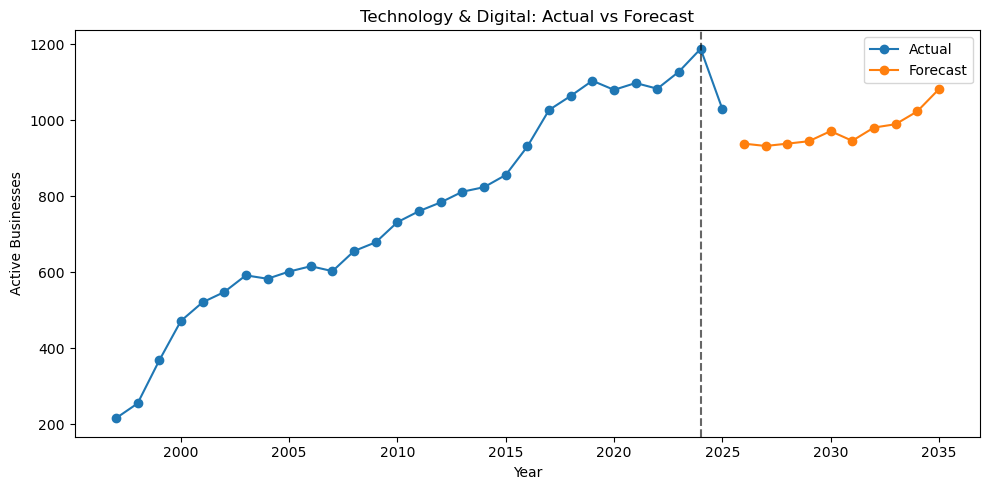

In [248]:
actual_bt_year = (
    df_active
    .groupby(['businesstype', 'year'])
    .size()
    .reset_index(name='actual_count')
)

forecast_bt_year = (
    agg_bt_year_clean[['BusinessType','year','total_ensemble_yhat']]
    .rename(columns={'total_ensemble_yhat':'forecast_count'})
)

actual_bt_year = actual_bt_year.rename(columns={'businesstype':'BusinessType'})

timeline = pd.merge(
    actual_bt_year,
    forecast_bt_year,
    how='outer',
    on=['BusinessType','year']
).sort_values(['BusinessType','year'])

import matplotlib.pyplot as plt

for bt in timeline['BusinessType'].unique():
    df_bt = timeline[timeline['BusinessType'] == bt]

    plt.figure(figsize=(10,5))
    plt.plot(df_bt['year'], df_bt['actual_count'], label='Actual', marker='o')
    plt.plot(df_bt['year'], df_bt['forecast_count'], label='Forecast', marker='o')
    
    plt.axvline(2024, color='black', linestyle='--', alpha=0.6)
    plt.title(f"{bt}: Actual vs Forecast")
    plt.xlabel("Year")
    plt.ylabel("Active Businesses")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [260]:
final_ensemble[['BusinessType','LocalArea']] = (
    final_ensemble['unique_id']
    .astype(str)
    .str.split(pat='-', n=1, expand=True)
)


In [261]:
bt_area_forecast = (
    final_ensemble
    .groupby(['BusinessType','LocalArea','year'])['ensemble_yhat']
    .sum()
    .reset_index()
)


In [262]:
def compute_cagr(df):
    df = df.sort_values('year')
    start = df.iloc[0]['ensemble_yhat']
    end   = df.iloc[-1]['ensemble_yhat']
    years = df.iloc[-1]['year'] - df.iloc[0]['year']
    if start <= 0:
        return np.nan
    return (end / start)**(1/years) - 1

cagr_scores = (
    bt_area_forecast
    .groupby(['BusinessType','LocalArea'])
    .apply(compute_cagr)
    .reset_index(name='CAGR')
)


/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_32526/390041808.py:13: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [263]:
best_locations = (
    cagr_scores
    .sort_values(['BusinessType','CAGR'], ascending=[True, False])
)


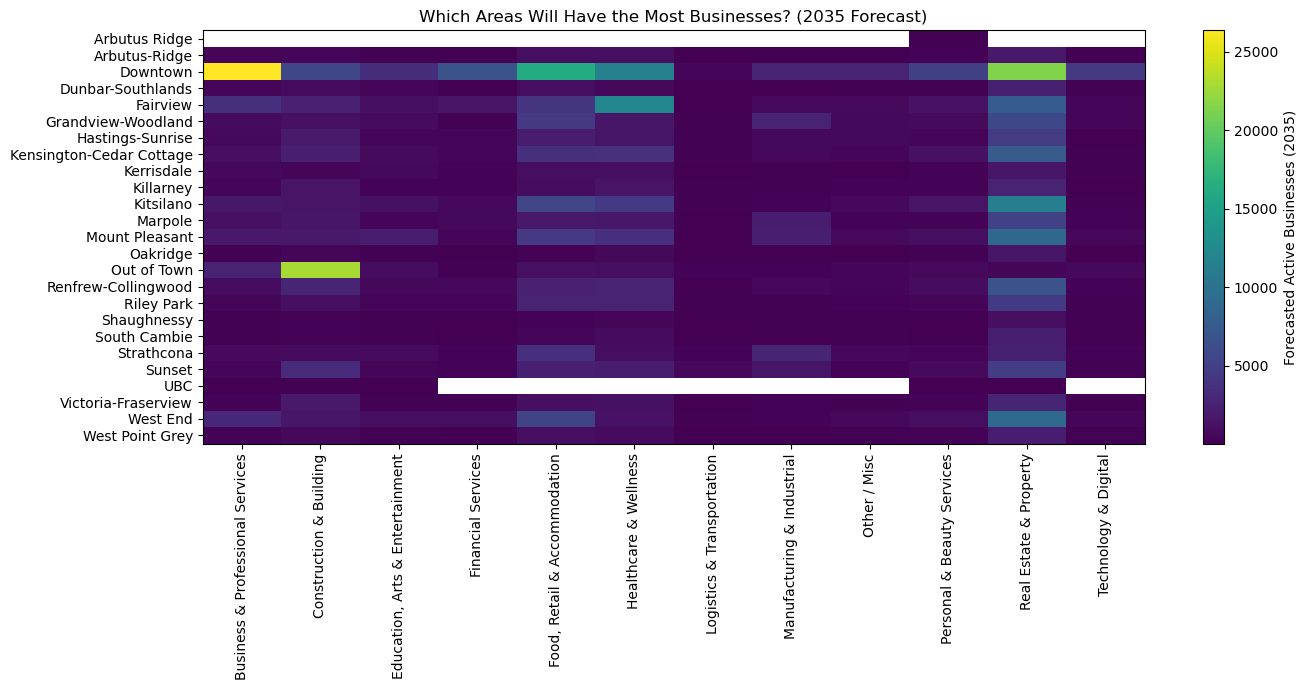

In [265]:
pivot_heat = bt_area_forecast.pivot_table(
    index='LocalArea',
    columns='BusinessType',
    values='ensemble_yhat',
    aggfunc='sum'
)

plt.figure(figsize=(14,7))
plt.imshow(pivot_heat, aspect='auto')
plt.colorbar(label='Forecasted Active Businesses (2035)')
plt.yticks(ticks=np.arange(len(pivot_heat.index)), labels=pivot_heat.index)
plt.xticks(ticks=np.arange(len(pivot_heat.columns)), labels=pivot_heat.columns, rotation=90)
plt.title("Which Areas Will Have the Most Businesses? (2035 Forecast)")
plt.tight_layout()
plt.show()


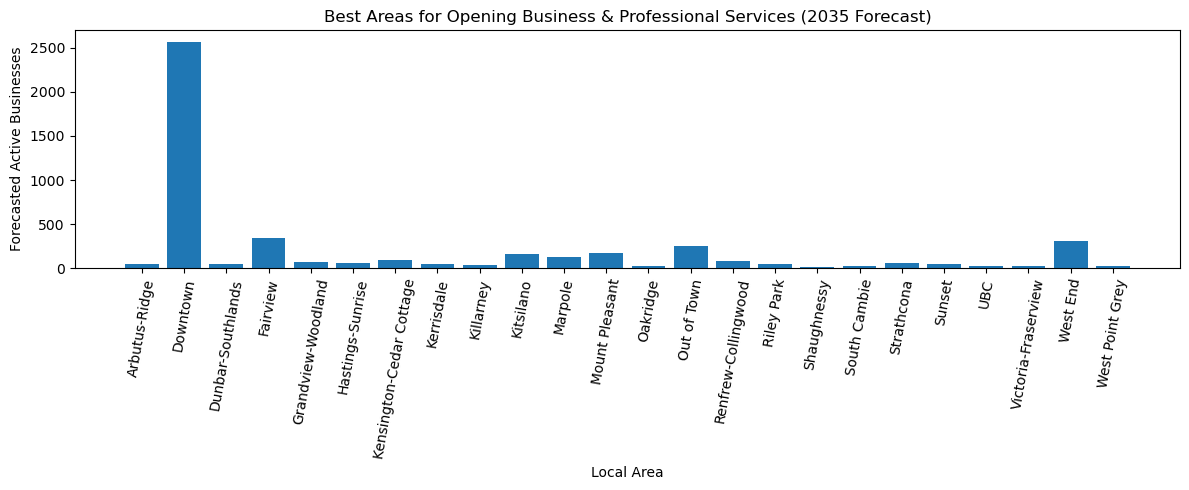

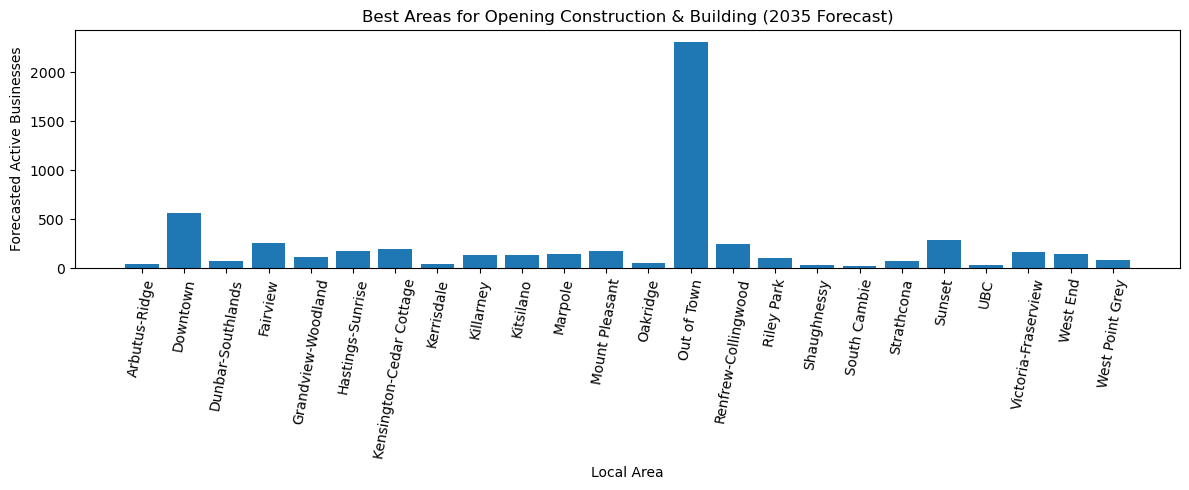

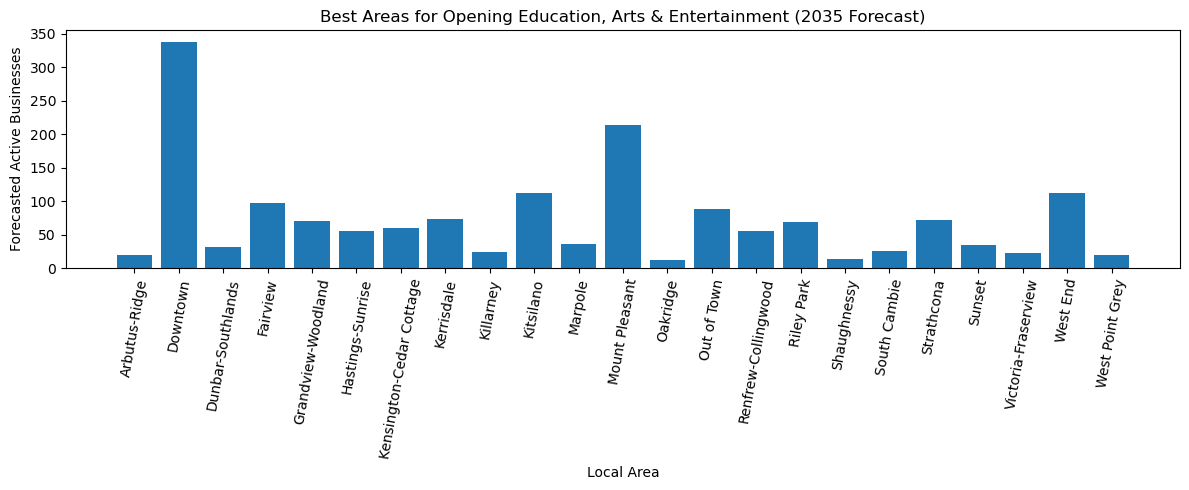

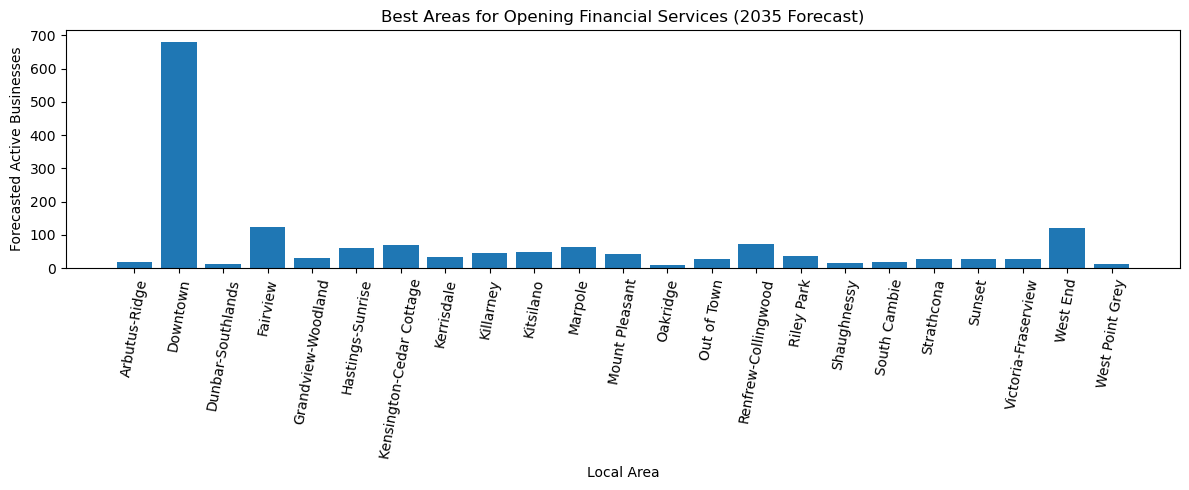

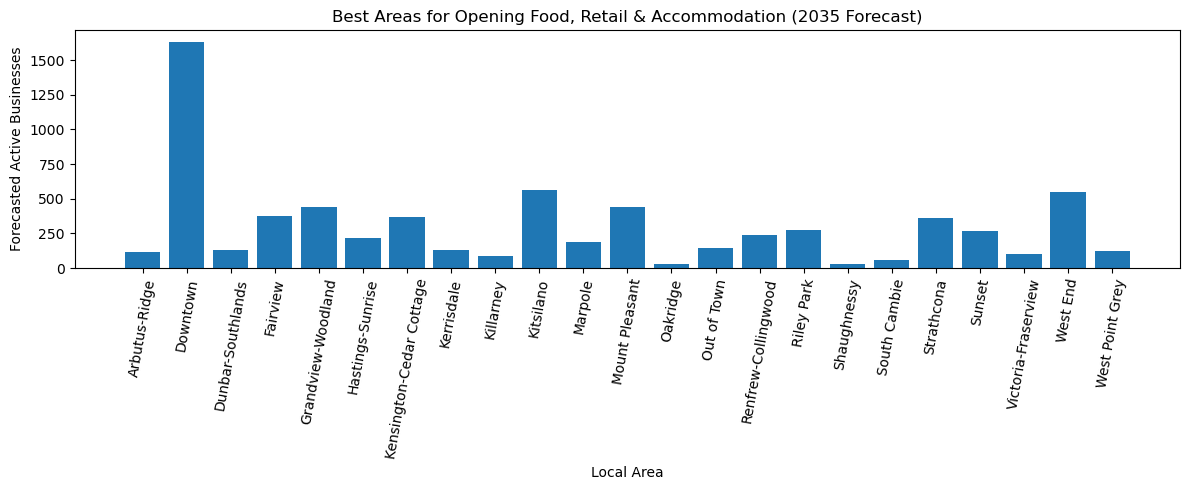

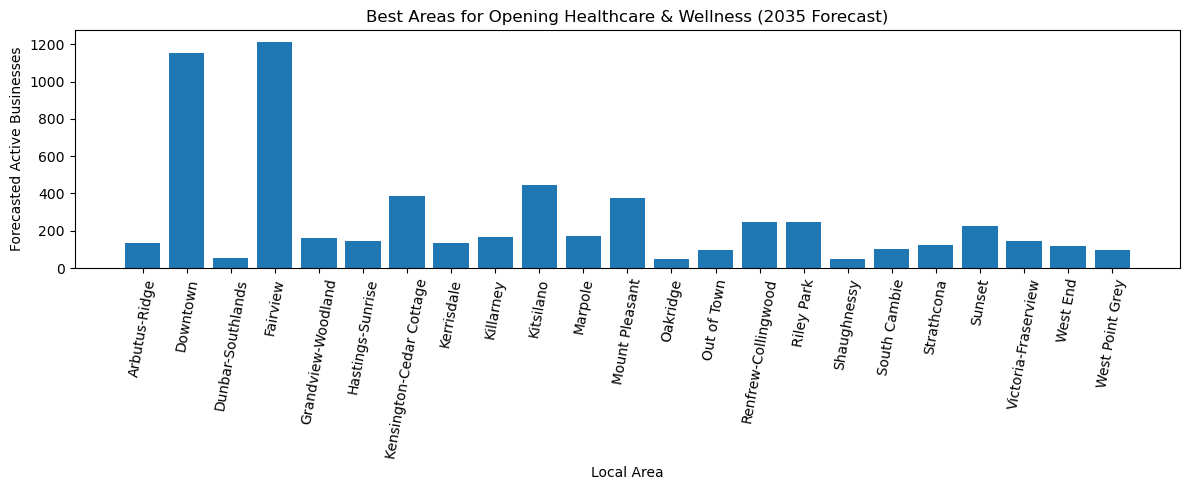

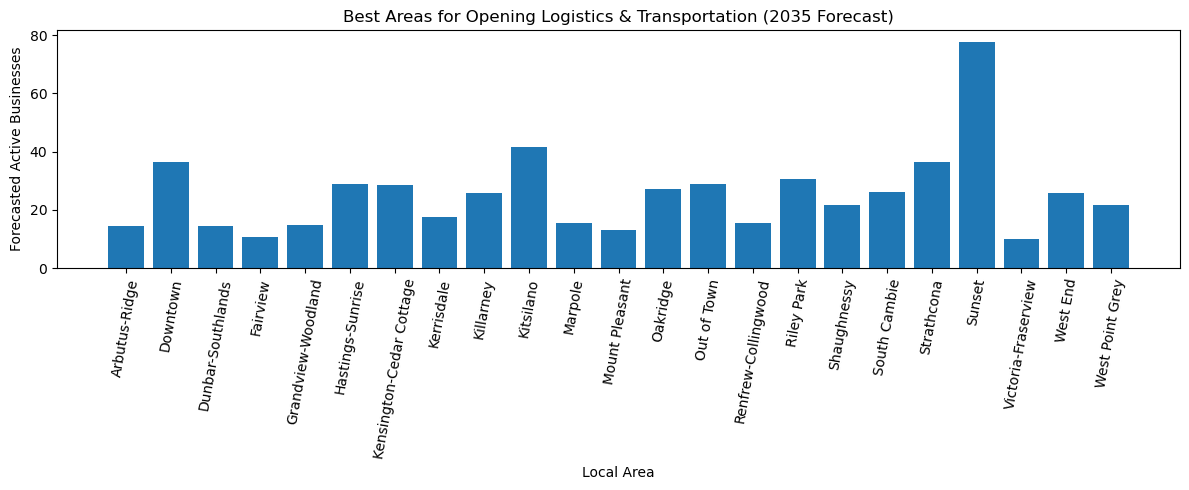

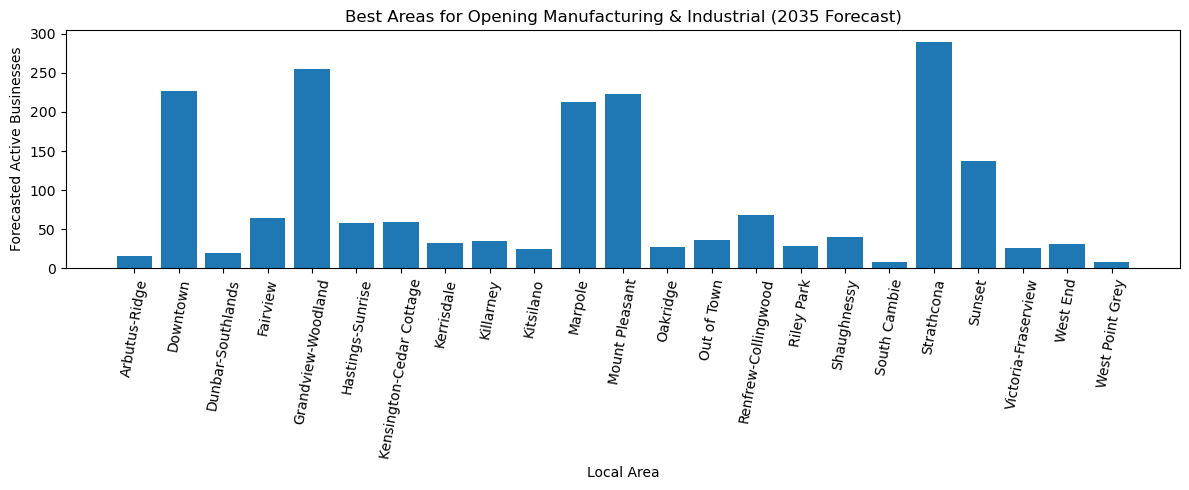

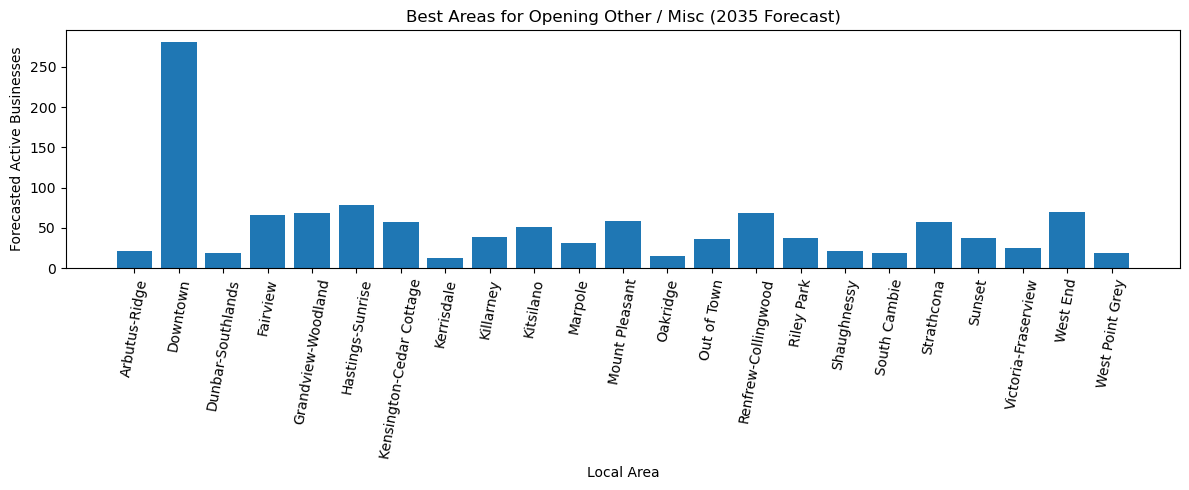

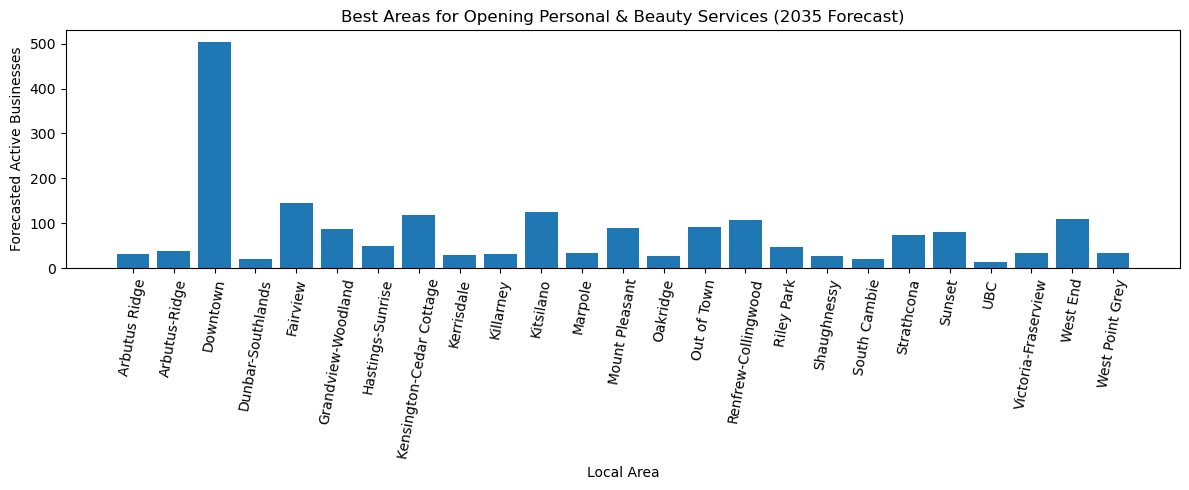

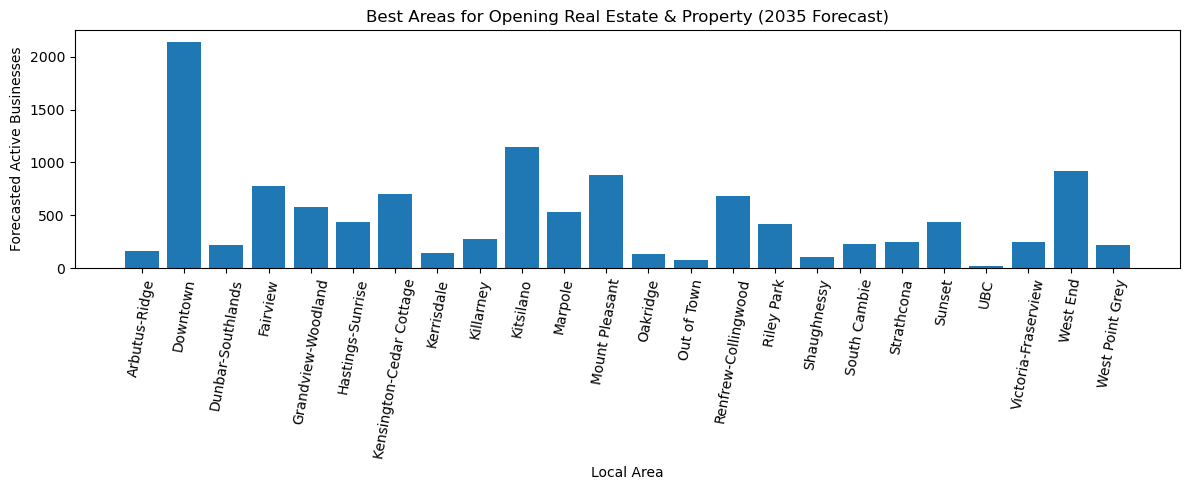

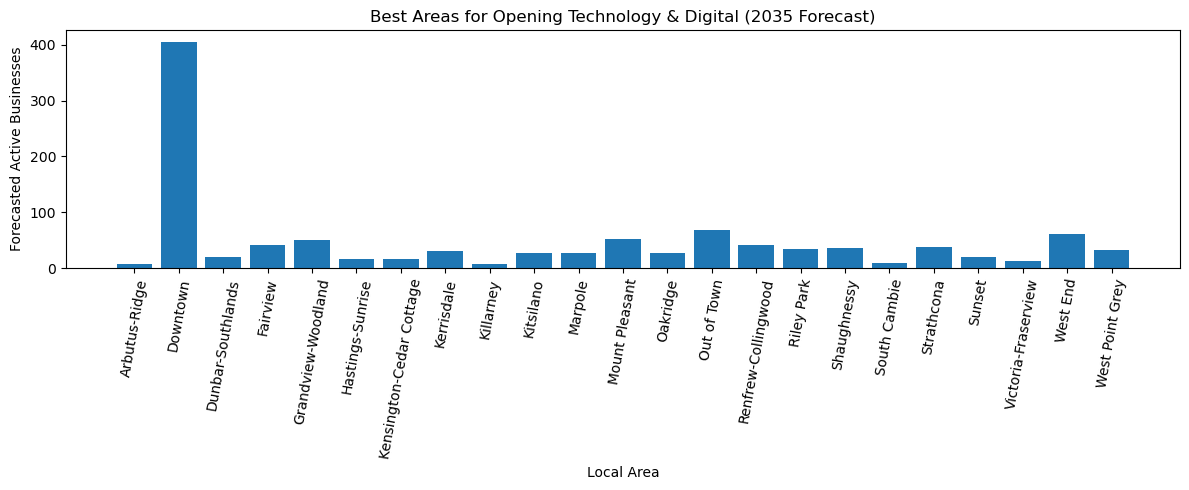

In [277]:
bt = "Business & Professional Services"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Construction & Building"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Education, Arts & Entertainment"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Financial Services"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Food, Retail & Accommodation"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Healthcare & Wellness"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Logistics & Transportation"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Manufacturing & Industrial"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Other / Misc"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Personal & Beauty Services"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Real Estate & Property"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

bt = "Technology & Digital"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_2035 = df_bt[df_bt['year'] == 2035]

plt.figure(figsize=(12,5))
plt.bar(df_2035['LocalArea'], df_2035['ensemble_yhat'])
plt.xticks(rotation=80)
plt.title(f"Best Areas for Opening {bt} (2035 Forecast)")
plt.xlabel("Local Area")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()

In [268]:
# Ensure unique_id has been split already
# final_ensemble already has: BusinessType, LocalArea

bt_area_forecast = (
    final_ensemble
    .groupby(['BusinessType','LocalArea','year'])['ensemble_yhat']
    .sum()
    .reset_index()
)


In [269]:
import numpy as np

def compute_cagr(df):
    df = df.sort_values('year')
    start = df.iloc[0]['ensemble_yhat']
    end   = df.iloc[-1]['ensemble_yhat']
    years = df.iloc[-1]['year'] - df.iloc[0]['year']
    if start <= 0 or years == 0:
        return np.nan
    return (end / start)**(1/years) - 1

cagr_scores = (
    bt_area_forecast
    .groupby(['BusinessType','LocalArea'])
    .apply(compute_cagr)
    .reset_index(name='CAGR')
)


/var/folders/sq/xwp5s3k94fj4b6_46hyhhp840000gn/T/ipykernel_32526/2947529029.py:15: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [270]:
best_locations = (
    cagr_scores
    .sort_values(['BusinessType','CAGR'], ascending=[True, False])
    .reset_index(drop=True)
)

best_locations.head(20)


,BusinessType,LocalArea,CAGR
0,Business & Professional Services,UBC,0.244619
1,Business & Professional Services,Marpole,0.011722
2,Business & Professional Services,West End,-0.003413
3,Business & Professional Services,Downtown,-0.003676
4,Business & Professional Services,Out of Town,-0.004688
5,Business & Professional Services,Oakridge,-0.013370
6,Business & Professional Services,Fairview,-0.019502
7,Business & Professional Services,South Cambie,-0.020384
8,Business & Professional Services,Mount Pleasant,-0.021024
9,Business & Professional Services,Kitsilano,-0.021711


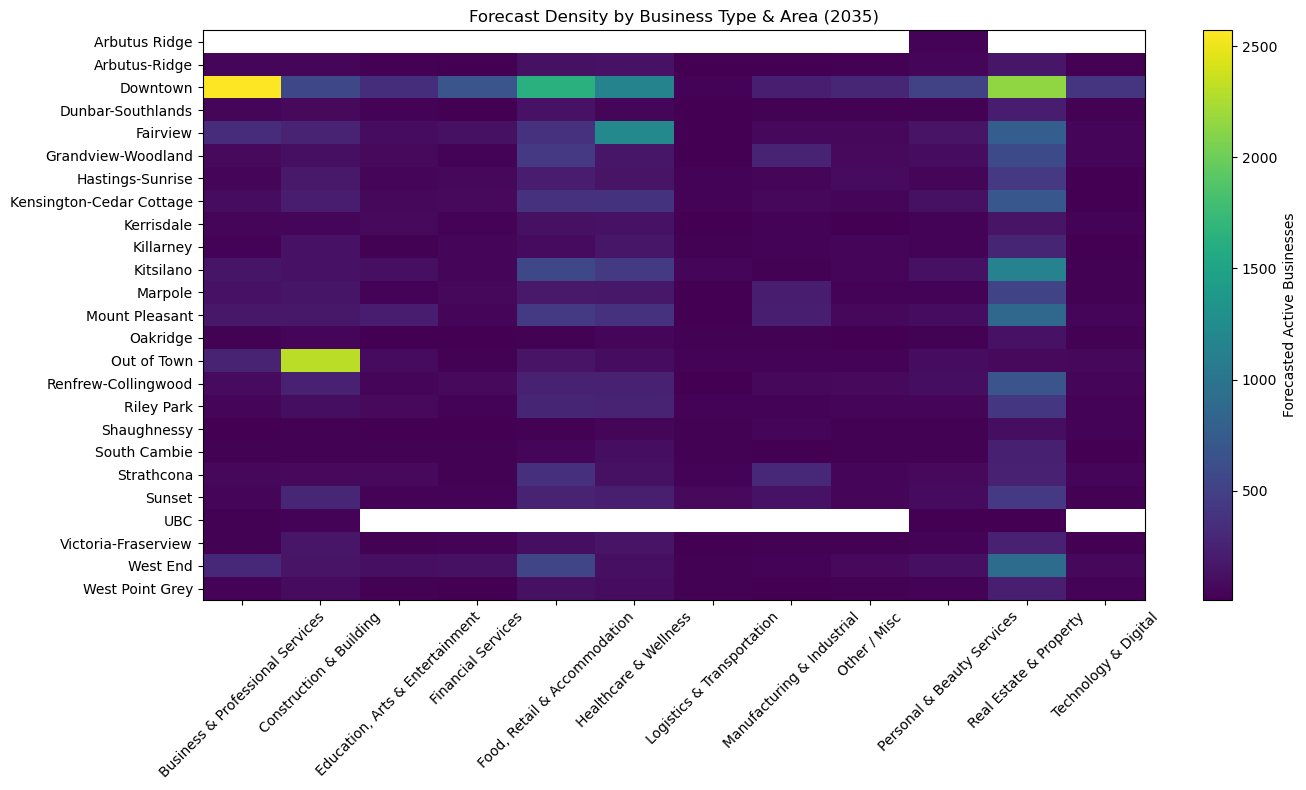

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# 2035 forecast (or last year in your forecast horizon)
final_year = bt_area_forecast['year'].max()

df_last = bt_area_forecast[bt_area_forecast['year'] == final_year]

pivot_heat = df_last.pivot_table(
    index='LocalArea',
    columns='BusinessType',
    values='ensemble_yhat',
    aggfunc='sum'
)

plt.figure(figsize=(14,8))
plt.imshow(pivot_heat, aspect='auto')
plt.colorbar(label='Forecasted Active Businesses')
plt.xticks(np.arange(len(pivot_heat.columns)), pivot_heat.columns, rotation=45)
plt.yticks(np.arange(len(pivot_heat.index)), pivot_heat.index)
plt.title(f"Forecast Density by Business Type & Area ({final_year})")
plt.tight_layout()
plt.show()


In [274]:
bt = "Technology & Digital"

df_bt = bt_area_forecast[bt_area_forecast['BusinessType'] == bt]
df_last = df_bt[df_bt['year'] == final_year]

plt.figure(figsize=(14,5))
plt.bar(df_last['LocalArea'], df_last['ensemble_yhat'])
plt.xticks(rotation=90)
plt.title(f"Best Areas for Opening {bt} ({final_year} Forecast)")
plt.ylabel("Forecasted Active Businesses")
plt.tight_layout()
plt.show()


,BusinessType,LocalArea,year,ensemble_yhat
2599,Technology & Digital,Arbutus-Ridge,2035,7.794432
2609,Technology & Digital,Downtown,2035,405.682644
2619,Technology & Digital,Dunbar-Southlands,2035,19.268096
2629,Technology & Digital,Fairview,2035,41.778137
2639,Technology & Digital,Grandview-Woodland,2035,49.699213
2649,Technology & Digital,Hastings-Sunrise,2035,17.138812
2659,Technology & Digital,Kensington-Cedar Cottage,2035,17.018273
2669,Technology & Digital,Kerrisdale,2035,30.695023
2679,Technology & Digital,Killarney,2035,7.826459
2689,Technology & Digital,Kitsilano,2035,27.106692
